## Experiment 2.1: Implement a simple ANN for CIFAR-10 Dataset with the help of TensorFlow and Keras module. Measure the performance and predict some new data

### Load data set and print a few data.



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 195s 1us/step


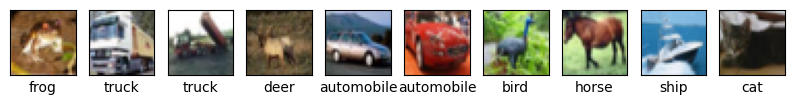

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Building a model from scartch just to understand the process of forward and back ward pass and training a mode.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = - np.log(y_pred[range(n_samples), y_true])
    loss = np.sum(logp) / n_samples
    return loss

def cross_entropy_loss_derivative(y_true, y_pred):
    grad = y_pred.copy()
    grad[range(y_true.shape[0]), y_true] -= 1
    return grad / y_true.shape[0]

input_dim = 32 * 32 * 3
hidden_layer1_dim = 128
hidden_layer2_dim = 64
output_dim = 10

np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_layer1_dim) * np.sqrt(2. / input_dim)
b1 = np.zeros((1, hidden_layer1_dim))
W2 = np.random.randn(hidden_layer1_dim, hidden_layer2_dim) * np.sqrt(2. / hidden_layer1_dim)
b2 = np.zeros((1, hidden_layer2_dim))
W3 = np.random.randn(hidden_layer2_dim, output_dim) * np.sqrt(2. / hidden_layer2_dim)
b3 = np.zeros((1, output_dim))

def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3

def backward(X, y, z1, a1, z2, a2, z3, a3, learning_rate=0.01):
    global W1, b1, W2, b2, W3, b3

    dz3 = cross_entropy_loss_derivative(y, a3)
    dW3 = np.dot(a2.T, dz3)
    db3 = np.sum(dz3, axis=0, keepdims=True)

    dz2 = np.dot(dz3, W3.T) * relu_derivative(z2)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, W2.T) * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

def load_cifar10():
    import tensorflow as tf
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
    train_images = train_images.astype('float32') / 255
    test_images = test_images.astype('float32') / 255
    train_labels = train_labels.flatten()
    test_labels = test_labels.flatten()
    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = load_cifar10()
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

epochs = 30
learning_rate = 0.01
train_accuracy_list = []
val_accuracy_list = []

validation_split = 0.1
num_val_samples = int(validation_split * train_images_flatten.shape[0])
val_images = train_images_flatten[:num_val_samples]
val_labels = train_labels[:num_val_samples]
partial_train_images = train_images_flatten[num_val_samples:]
partial_train_labels = train_labels[num_val_samples:]

for epoch in range(epochs):
    z1, a1, z2, a2, z3, a3 = forward(partial_train_images)
    loss = cross_entropy_loss(partial_train_labels, a3)
    backward(partial_train_images, partial_train_labels, z1, a1, z2, a2, z3, a3, learning_rate)
    train_predictions = np.argmax(a3, axis=1)
    train_accuracy = np.mean(train_predictions == partial_train_labels)
    train_accuracy_list.append(train_accuracy)
    z1_val, a1_val, z2_val, a2_val, z3_val, a3_val = forward(val_images)
    val_predictions = np.argmax(a3_val, axis=1)
    val_accuracy = np.mean(val_predictions == val_labels)
    val_accuracy_list.append(val_accuracy)
    print(f'Epoch {epoch+1}/{epochs}, Train Accuracy: {train_accuracy}, Val Accuracy: {val_accuracy}')

_, _, _, _, _, a3_test = forward(test_images_flatten)
test_predictions = np.argmax(a3_test, axis=1)
test_accuracy = np.mean(test_predictions == test_labels)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/30, Train Accuracy: 0.1128, Val Accuracy: 0.1186
Epoch 2/30, Train Accuracy: 0.11971111111111112, Val Accuracy: 0.128
Epoch 3/30, Train Accuracy: 0.12793333333333334, Val Accuracy: 0.1348
Epoch 4/30, Train Accuracy: 0.13686666666666666, Val Accuracy: 0.1432
Epoch 5/30, Train Accuracy: 0.14486666666666667, Val Accuracy: 0.148
Epoch 6/30, Train Accuracy: 0.14922222222222223, Val Accuracy: 0.152
Epoch 7/30, Train Accuracy: 0.15288888888888888, Val Accuracy: 0.1554
Epoch 8/30, Train Accuracy: 0.15711111111111112, Val Accuracy: 0.1598
Epoch 9/30, Train Accuracy: 0.15982222222222223, Val Accuracy: 0.1632
Epoch 10/30, Train Accuracy: 0.16286666666666666, Val Accuracy: 0.1682
Epoch 11/30, Train Accuracy: 0.16533333333333333, Val Accuracy: 0.1682
Epoch 12/30, Train Accuracy: 0.16857777777777777, Val Accuracy: 0.1718
Epoch 13/30, Train Accuracy: 0.17155555555555554, Val Accuracy: 0.176
Epoch 14/30, Train Accuracy: 0.1749777777777778, Val Accuracy: 0.1806
Epoch 15/30, Train Accuracy: 0.17

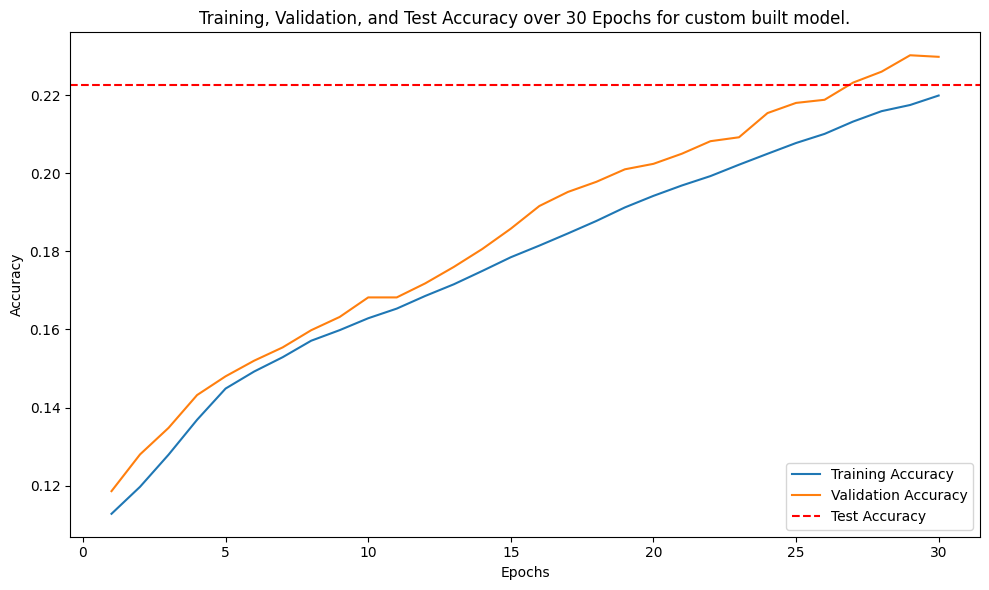

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracy_list, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy over 30 Epochs for custom built model.')
plt.legend()
plt.tight_layout()
plt.show()

### Using the tensorflow inbuilt fuction to build and evaluate a model.

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(64, activation='relu'),  
    layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(val_images, val_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2537 - loss: 2.0486 - val_accuracy: 0.3581 - val_loss: 1.7957
Epoch 2/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3715 - loss: 1.7650 - val_accuracy: 0.4094 - val_loss: 1.6703
Epoch 3/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4118 - loss: 1.6684 - val_accuracy: 0.4185 - val_loss: 1.6475
Epoch 4/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4349 - loss: 1.5989 - val_accuracy: 0.4365 - val_loss: 1.5981
Epoch 5/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4447 - loss: 1.5610 - val_accuracy: 0.4373 - val_loss: 1.5883
Epoch 6/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4551 - loss: 1.5266 - val_accuracy: 0.4486 - val_loss: 1.5620
Epoch 7/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4715 - loss: 1.4915 - val_accuracy: 0.4648 - val_loss: 1.5235
Epoch 8/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4860 - loss: 1.4676 - 

### Measuring the accouracy of the model.

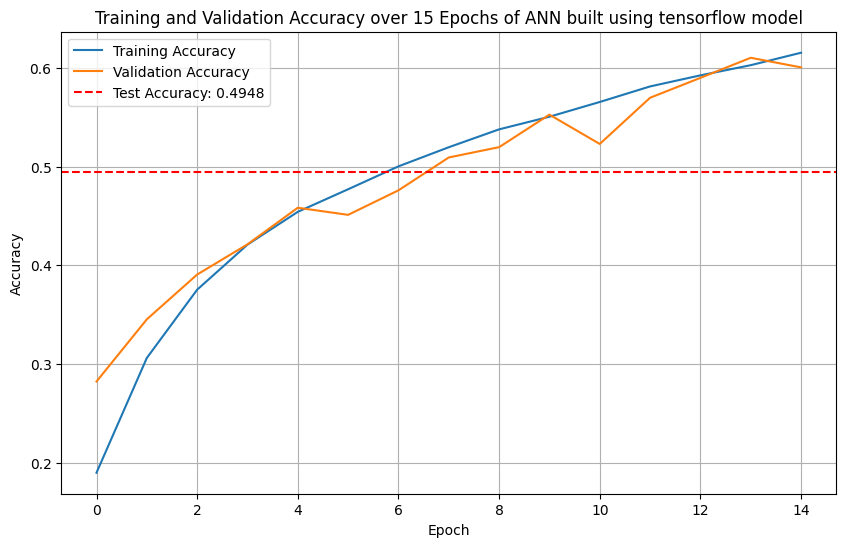

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy: {test_acc:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over 15 Epochs of ANN built using tensorflow model')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The model predicts that the image belongs to class: frog


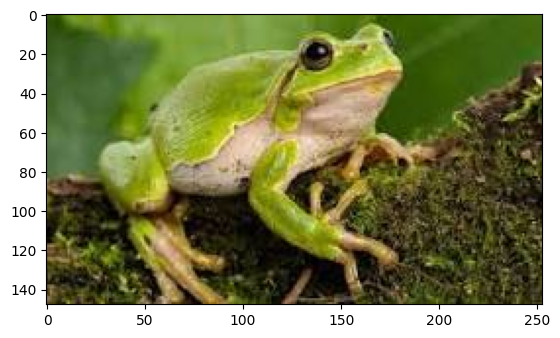

In [19]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    plt.imshow(image.load_img(img_path)) 
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    return img_array

def predict_image_class(model, img_path):
    new_image = load_and_preprocess_image(img_path)
    predictions = model.predict(new_image)
    predicted_class = np.argmax(predictions)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicted_class_name = class_names[predicted_class]
    return predicted_class_name

new_image_path = 'frog.jpg'
predicted_class_name = predict_image_class(model, new_image_path)
print(f'The model predicts that the image belongs to class: {predicted_class_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The model predicts that the image belongs to class: airplane


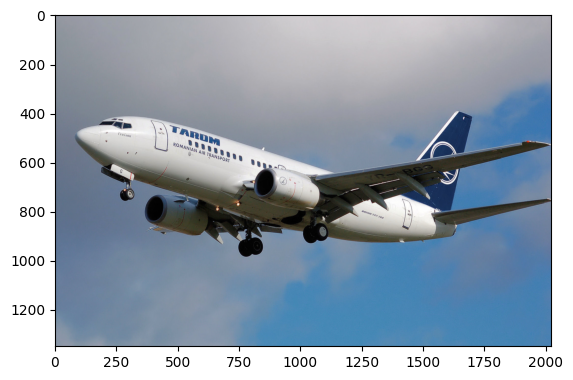

In [21]:
new_image_path = 'aeroplane.jpg'
predicted_class_name = predict_image_class(model, new_image_path)
print(f'The model predicts that the image belongs to class: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The model predicts that the image belongs to class: airplane


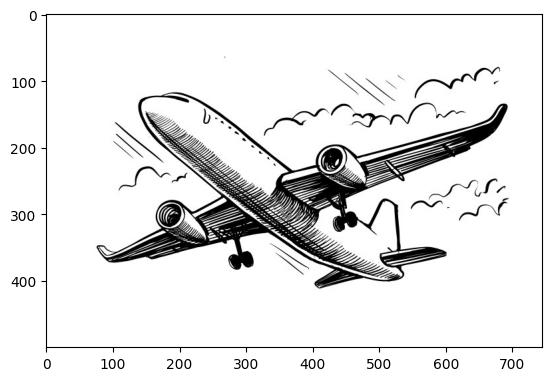

In [22]:

new_image_path = 'a1.jpg'
predicted_class_name = predict_image_class(model, new_image_path)
print(f'The model predicts that the image belongs to class: {predicted_class_name}')

---

## Experiment 2.2: Implement a simple CNN for same data set and compare the performance of the first model and this model

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, batch_size=64,
                    validation_data=(val_images, val_labels))

test_loss, test_acc1 = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc1}')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1452 - loss: 2.2637 - val_accuracy: 0.2823 - val_loss: 1.9922
Epoch 2/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2880 - loss: 1.9626 - val_accuracy: 0.3453 - val_loss: 1.8435
Epoch 3/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3584 - loss: 1.7802 - val_accuracy: 0.3906 - val_loss: 1.6947
Epoch 4/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4121 - loss: 1.6300 - val_accuracy: 0.4212 - val_loss: 1.6565
Epoch 5/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4482 - loss: 1.5340 - val_accuracy: 0.4583 - val_loss: 1.5104
Epoch 6/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4735 - loss: 1.4611 - val_accuracy: 0.4511 - val_loss: 1.5378
Epoch 7/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4952 - loss: 1.4169 - val_accuracy: 0.4760 - val_loss: 1.4040
Epoch 8/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5141 - loss: 1.3605 - val_

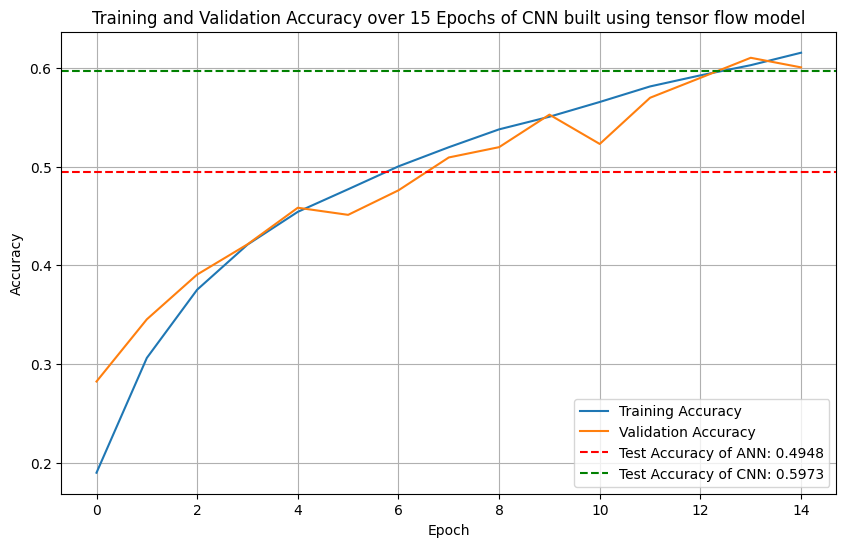

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, c='r',  linestyle='--', label=f'Test Accuracy of ANN: {test_acc:.4f}')
plt.axhline(y=test_acc1, c='g' ,linestyle='--', label=f'Test Accuracy of CNN: {test_acc1:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over 15 Epochs of CNN built using tensor flow model')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 90ms/step
The model predicts that the image belongs to class: frog


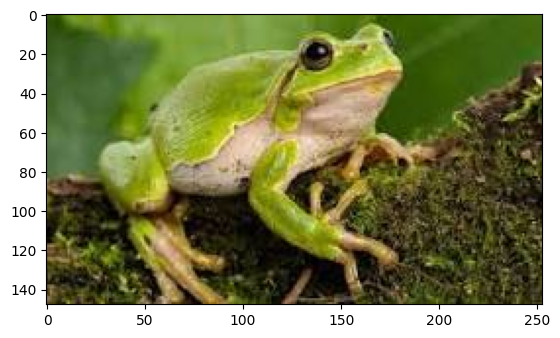

In [13]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    plt.imshow(image.load_img(img_path))  # Resize image to 32x32
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1] range
    return img_array

# Function to predict the class of a new image
def predict_image_class(model, img_path):
    new_image = load_and_preprocess_image(img_path)
    predictions = model.predict(new_image)
    predicted_class = np.argmax(predictions)
    class_names = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicted_class_name = class_names[predicted_class]
    return predicted_class_name

# Example usage
new_image_path = '/content/frog.jpg'
predicted_class_name = predict_image_class(model, new_image_path)
print(f'The model predicts that the image belongs to class: {predicted_class_name}')


1/1 [==============================] - 0s 29ms/step
The model predicts that the image belongs to class: aeroplane


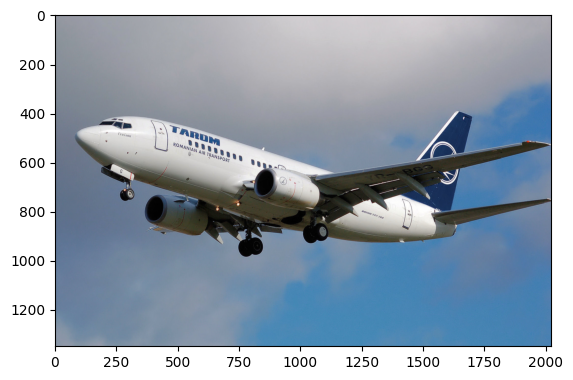

In [14]:

new_image_path = '/content/aeroplane.jpg'
predicted_class_name = predict_image_class(model, new_image_path)
print(f'The model predicts that the image belongs to class: {predicted_class_name}')


1/1 [==============================] - 0s 22ms/step
The model predicts that the image belongs to class: aeroplane


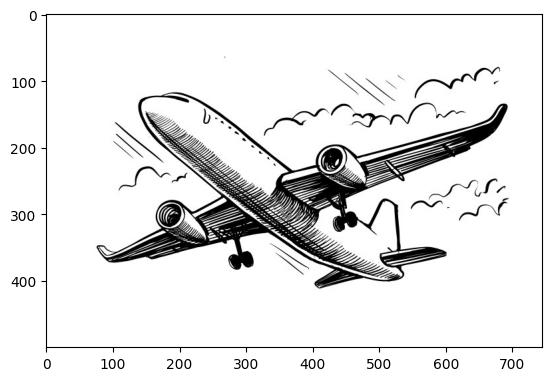

In [15]:
new_image_path = '/content/a1.jpg'
predicted_class_name = predict_image_class(model, new_image_path)
print(f'The model predicts that the image belongs to class: {predicted_class_name}')

1/1 [==============================] - 0s 19ms/step
The model predicts that the image belongs to class: horse


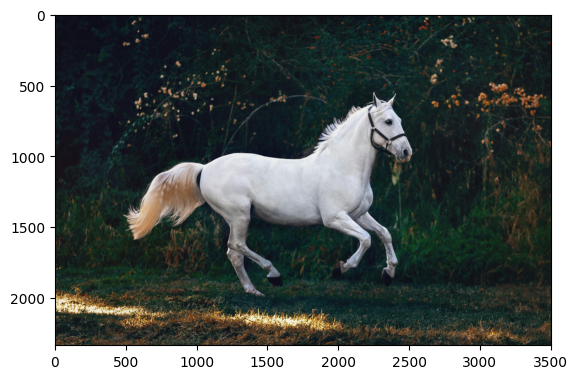

In [16]:
new_image_path = '/content/horse.jpg'
predicted_class_name = predict_image_class(model, new_image_path)
print(f'The model predicts that the image belongs to class: {predicted_class_name}')

1/1 [==============================] - 0s 41ms/step
The model predicts that the image belongs to class: ship


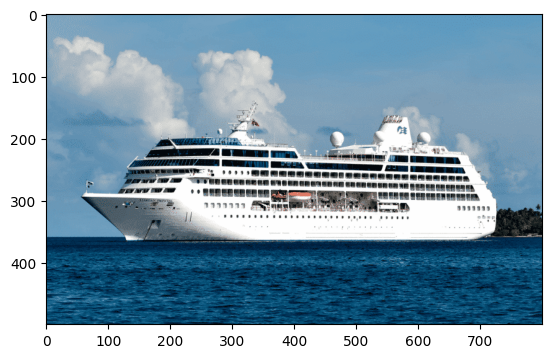

In [17]:
new_image_path = '/content/ship.png'
predicted_class_name = predict_image_class(model, new_image_path)
print(f'The model predicts that the image belongs to class: {predicted_class_name}')

## Experiment 2.3: Understand the behaviour of role of Network Architecture’s complexity. Work on understanding the effect of no of layers, no of neurons in each layer and effect of activation functions on models’ performance.

### Dense ANN

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)


model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  
    layers.Dense(256, activation='relu'),  
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(val_images, val_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1863 - loss: 2.1786 - val_accuracy: 0.2859 - val_loss: 2.0030
Epoch 2/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3319 - loss: 1.8535 - val_accuracy: 0.3753 - val_loss: 1.7383
Epoch 3/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3816 - loss: 1.7135 - val_accuracy: 0.3890 - val_loss: 1.7013
Epoch 4/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4151 - loss: 1.6337 - val_accuracy: 0.4313 - val_loss: 1.5896
Epoch 5/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4343 - loss: 1.5674 - val_accuracy: 0.4232 - val_loss: 1.6246
Epoch 6/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4513 - loss: 1.5275 - val_accuracy: 0.4389 - val_loss: 1.5740
Epoch 7/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4698 - loss: 1.4774 - val_accuracy: 0.4558 - val_loss: 1.5225
Epoch 8/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4848 - loss: 1.4395 - 

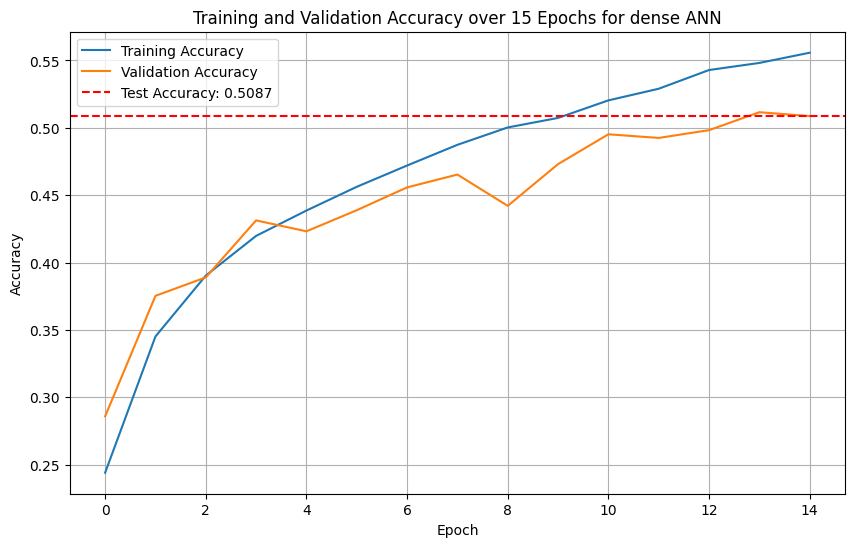

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy: {test_acc:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over 15 Epochs for dense ANN')
plt.legend()
plt.grid(True)
plt.show()

### Dense CNN

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)


model = models.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, batch_size=64,
                    validation_data=(val_images, val_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 168s 240ms/step - accuracy: 0.1322 - loss: 2.2889 - val_accuracy: 0.1851 - val_loss: 2.1450
Epoch 2/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 159s 229ms/step - accuracy: 0.2335 - loss: 2.0681 - val_accuracy: 0.3177 - val_loss: 1.8946
Epoch 3/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 165s 238ms/step - accuracy: 0.3290 - loss: 1.8680 - val_accuracy: 0.3894 - val_loss: 1.6980
Epoch 4/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 161s 232ms/step - accuracy: 0.3988 - loss: 1.6747 - val_accuracy: 0.4135 - val_loss: 1.6278
Epoch 5/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 159s 228ms/step - accuracy: 0.4411 - loss: 1.5462 - val_accuracy: 0.4497 - val_loss: 1.4974
Epoch 6/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 158s 228ms/step - accuracy: 0.4740 - loss: 1.4549 - val_accuracy: 0.4725 - val_loss: 1.4256
Epoch 7/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 158s 228ms/step - accuracy: 0.5056 - loss: 1.3737 - val_accuracy: 0.4594 - val_loss: 1.4897
Epoch 8/15
695/695 ━━━━━━━━━━━━━━━━━━━━ 158s 228ms/step - accuracy: 0.5338 -

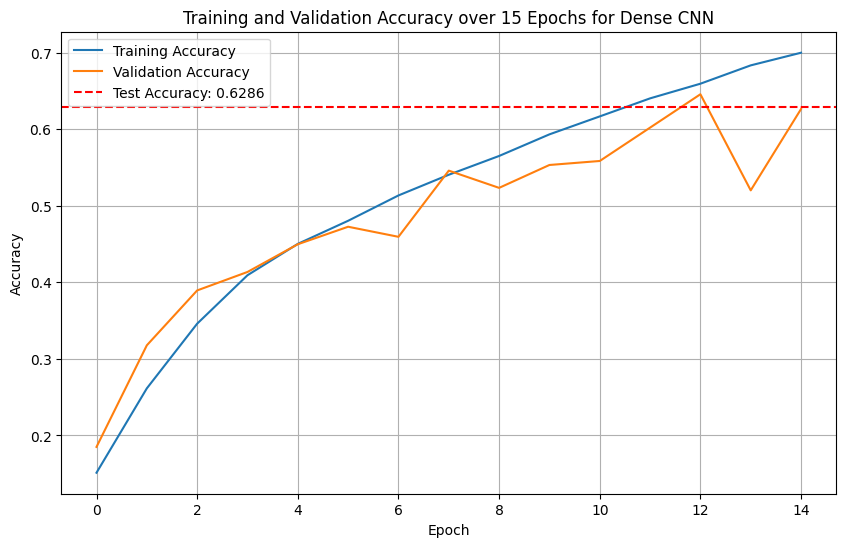

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy: {test_acc:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over 15 Epochs for Dense CNN')
plt.legend()
plt.grid(True)
plt.show()

### Activation function experiments

#### Experiment to study the model's performance when using both Relu and sigmoid activation functions.

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)), 
    layers.Dense(256, activation='relu'),  
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='sgd',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0981 - loss: 2.3061 - val_accuracy: 0.1001 - val_loss: 2.3030
Epoch 2/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1016 - loss: 2.3036 - val_accuracy: 0.0999 - val_loss: 2.3031
Epoch 3/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1057 - loss: 2.3026 - val_accuracy: 0.1001 - val_loss: 2.3010
Epoch 4/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1102 - loss: 2.3006 - val_accuracy: 0.1267 - val_loss: 2.2928
Epoch 5/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1351 - loss: 2.2815 - val_accuracy: 0.1770 - val_loss: 2.1606
Epoch 6/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1688 - loss: 2.1210 - val_accuracy: 0.1878 - val_loss: 2.0780
Epoch 7/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1897 - loss: 2.0562 - val_accuracy: 0.1951 - val_loss: 2.0433
Epoch 8/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1974 - loss: 2.0409 - 

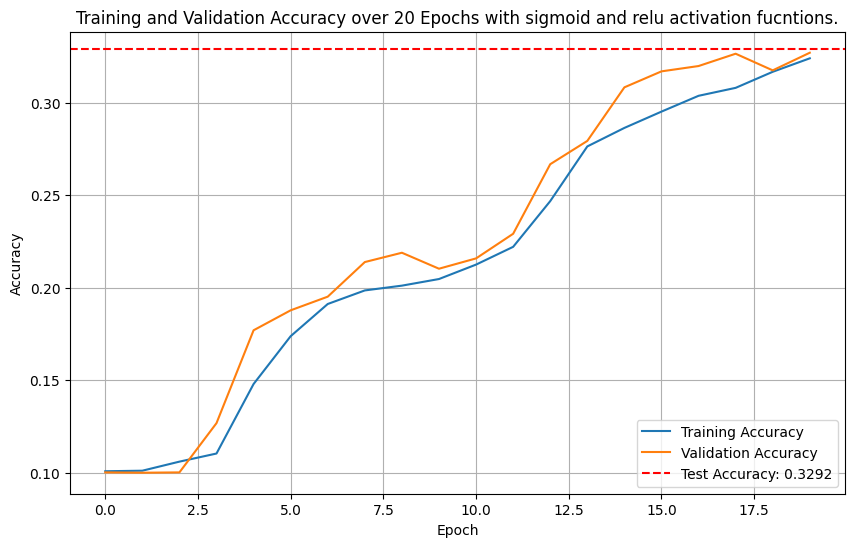

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy: {test_acc:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over 20 Epochs with sigmoid and relu activation fucntions.')
plt.legend()
plt.grid(True)
plt.show()

#### Experiment to study the model's performance when using relu, elu, selu, tanh and sigmiod activation fucntions.

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)), 
    layers.Dense(128, activation='relu'),  
    layers.Dense(128, activation='tanh'),  
    layers.Dense(128, activation='elu'),   
    layers.Dense(64, activation='selu'),  
    layers.Dense(64, activation='sigmoid'),  
    layers.Dense(32, activation='tanh'),   
    layers.Dense(32, activation='elu'),   
    layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='sgd',  
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])  


history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels))


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1810 - loss: 2.1876 - val_accuracy: 0.3123 - val_loss: 1.9055
Epoch 2/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3235 - loss: 1.8807 - val_accuracy: 0.3784 - val_loss: 1.7500
Epoch 3/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3713 - loss: 1.7434 - val_accuracy: 0.4090 - val_loss: 1.6565
Epoch 4/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4003 - loss: 1.6563 - val_accuracy: 0.3953 - val_loss: 1.6640
Epoch 5/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4203 - loss: 1.5955 - val_accuracy: 0.4385 - val_loss: 1.5918
Epoch 6/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4376 - loss: 1.5506 - val_accuracy: 0.4308 - val_loss: 1.5840
Epoch 7/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4573 - loss: 1.5062 - val_accuracy: 0.4502 - val_loss: 1.5623
Epoch 8/20
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4730 - loss: 1.4744 - 

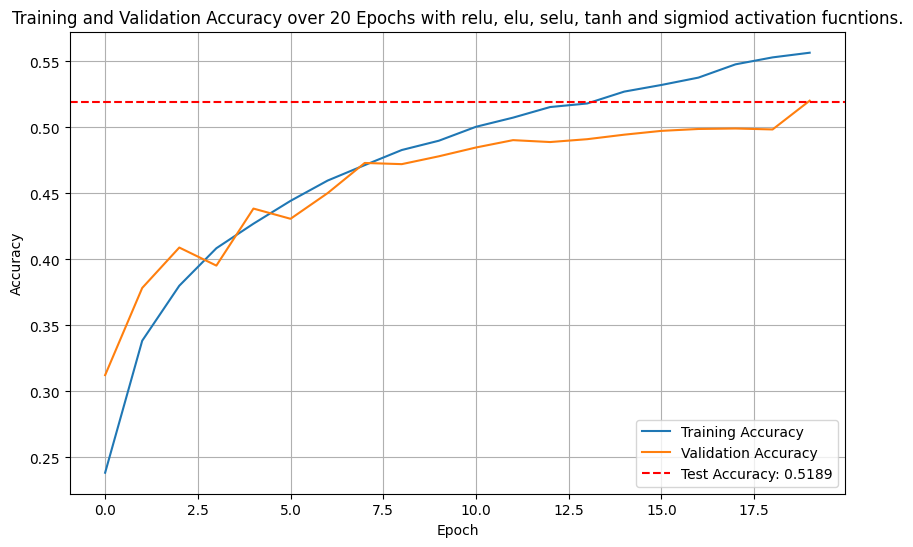

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy: {test_acc:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over 20 Epochs with relu, elu, selu, tanh and sigmiod activation fucntions.')
plt.legend()
plt.grid(True)
plt.show()

#### Experiment to study the model's performance when using relu, elu, selu, tanh and sigmiod activation fucntions individaully .

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

activation_functions = ['relu', 'tanh', 'elu', 'selu', 'sigmoid']

results = {}

for activation in activation_functions:
    print(f"Training model with {activation} activation...")
    
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(128, activation=activation),
        layers.Dense(128, activation=activation),
        layers.Dense(128, activation=activation),
        layers.Dense(64, activation=activation),
        layers.Dense(64, activation=activation),
        layers.Dense(32, activation=activation),
        layers.Dense(32, activation=activation),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(val_images, val_labels),
                        verbose=0)
    
    val_acc = max(history.history['val_accuracy'])
    results[activation] = {
        'val_acc': val_acc
    }

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    results[activation]['test_acc'] = test_acc

    print(f"{activation} - Validation Accuracy: {val_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Extracting results for plotting
activation_names = []
val_accuracies = []
test_accuracies = []

for activation in activation_functions:
    activation_names.append(activation)
    val_accuracies.append(results[activation]['val_acc'])
    test_accuracies.append(results[activation]['test_acc'])


Training model with relu activation...


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


relu - Validation Accuracy: 0.4625, Test Accuracy: 0.4705
Training model with tanh activation...
tanh - Validation Accuracy: 0.4695, Test Accuracy: 0.4721
Training model with elu activation...
elu - Validation Accuracy: 0.4851, Test Accuracy: 0.4840
Training model with selu activation...
selu - Validation Accuracy: 0.4738, Test Accuracy: 0.4812
Training model with sigmoid activation...
sigmoid - Validation Accuracy: 0.1001, Test Accuracy: 0.1000


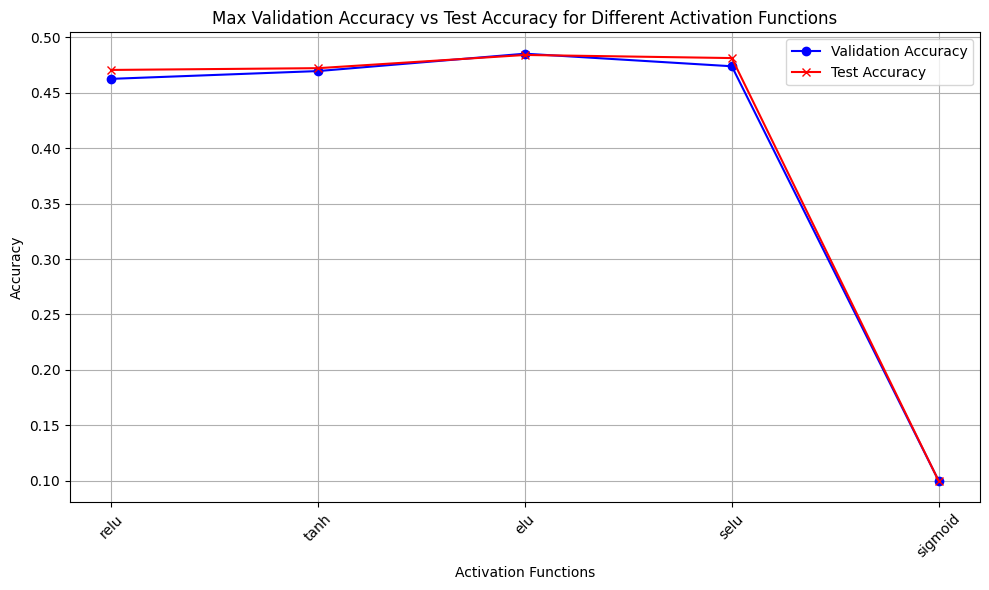

In [50]:

plt.figure(figsize=(10, 6))
plt.plot(activation_names, val_accuracies, marker='o', linestyle='-', color='b', label='Validation Accuracy')
plt.plot(activation_names, test_accuracies, marker='x', linestyle='-', color='r', label='Test Accuracy')
plt.title('Max Validation Accuracy vs Test Accuracy for Different Activation Functions')
plt.xlabel('Activation Functions')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Experiment 2.4: Understand the Epochs and find the optimal number of epochs to train the model by considering Overfitting and Underfitting problems. 

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=250,
                    validation_data=(val_images, val_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/250
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2072 - loss: 2.1500 - val_accuracy: 0.3447 - val_loss: 1.8308
Epoch 2/250
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3435 - loss: 1.8188 - val_accuracy: 0.3870 - val_loss: 1.7091
Epoch 3/250
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3890 - loss: 1.6942 - val_accuracy: 0.3879 - val_loss: 1.7057
Epoch 4/250
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4182 - loss: 1.6164 - val_accuracy: 0.4041 - val_loss: 1.6668
Epoch 5/250
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4415 - loss: 1.5550 - val_accuracy: 0.4445 - val_loss: 1.5384
Epoch 6/250
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4532 - loss: 1.5109 - val_accuracy: 0.4432 - val_loss: 1.5440
Epoch 7/250
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4746 - loss: 1.4596 - val_accuracy: 0.4565 - val_loss: 1.5206
Epoch 8/250
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4890 - loss: 1

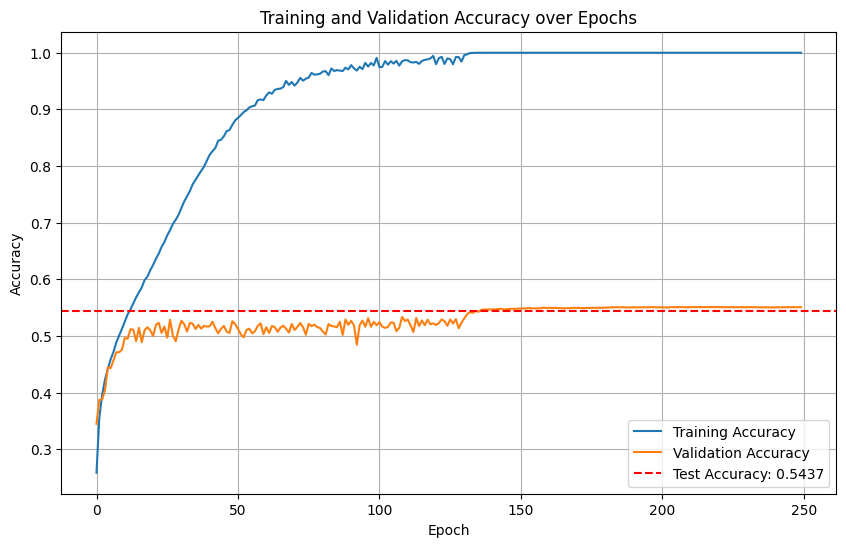

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy: {test_acc:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

model = models.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=150, batch_size=64,
                    validation_data=(val_images, val_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
695/695 ━━━━━━━━━━━━━━━━━━━━ 149s 213ms/step - accuracy: 0.1529 - loss: 2.2909 - val_accuracy: 0.2049 - val_loss: 2.1162
Epoch 2/150
695/695 ━━━━━━━━━━━━━━━━━━━━ 147s 211ms/step - accuracy: 0.2338 - loss: 2.0732 - val_accuracy: 0.2547 - val_loss: 2.0559
Epoch 3/150
695/695 ━━━━━━━━━━━━━━━━━━━━ 148s 212ms/step - accuracy: 0.3175 - loss: 1.8878 - val_accuracy: 0.3784 - val_loss: 1.7186
Epoch 4/150
695/695 ━━━━━━━━━━━━━━━━━━━━ 148s 213ms/step - accuracy: 0.3914 - loss: 1.6989 - val_accuracy: 0.4283 - val_loss: 1.5894
Epoch 5/150
695/695 ━━━━━━━━━━━━━━━━━━━━ 152s 218ms/step - accuracy: 0.4329 - loss: 1.5657 - val_accuracy: 0.4652 - val_loss: 1.4914
Epoch 6/150
695/695 ━━━━━━━━━━━━━━━━━━━━ 149s 215ms/step - accuracy: 0.4649 - loss: 1.4826 - val_accuracy: 0.4767 - val_loss: 1.4150
Epoch 7/150
695/695 ━━━━━━━━━━━━━━━━━━━━ 147s 212ms/step - accuracy: 0.4981 - loss: 1.3985 - val_accuracy: 0.4842 - val_loss: 1.4140
Epoch 8/150
695/695 ━━━━━━━━━━━━━━━━━━━━ 145s 208ms/step - accuracy: 

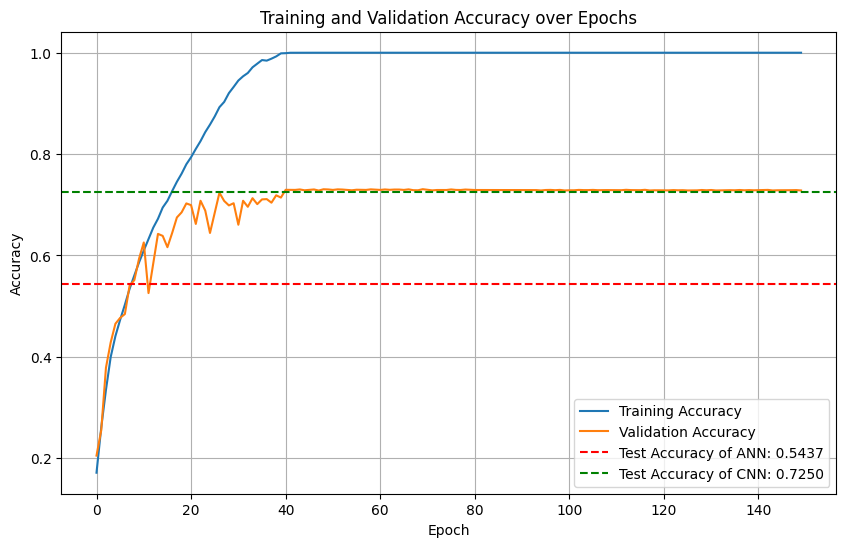

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, c='r',  linestyle='--', label=f'Test Accuracy of ANN: {test_acc:.4f}')
plt.axhline(y=test_acc1, c='g' ,linestyle='--', label=f'Test Accuracy of CNN: {test_acc1:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Experiment 2.5: Understand the effect of weight initialization technique on models’ performance.

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, initializers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

def create_ann_model(initializer):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(128, activation='relu', kernel_initializer=initializer),
        layers.Dense(64, activation='relu', kernel_initializer=initializer),
        layers.Dense(10, activation='softmax', kernel_initializer=initializer)
    ])
    model.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

initializers_list = {
    'Zero Initialization': initializers.Zeros(),
    'Random Normal Initialization': initializers.RandomNormal(mean=0.0, stddev=1.0, seed=42),
    'Random Uniform Initialization': initializers.RandomUniform(minval=0.0, maxval=1.0, seed=42),
    'Xavier/Glorot Uniform Initialization': initializers.GlorotUniform(seed=42),
    'He Uniform Initialization': initializers.HeUniform(seed=42),
    'Xavier/Glorot Normal Initialization': initializers.GlorotNormal(seed=42),
    'He Normal Initialization': initializers.HeNormal(seed=42)
}

initializer_names = []
val_accuracies = []
test_accuracies = []

for name, initializer in initializers_list.items():
    model = create_ann_model(initializer)
    history = model.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels), verbose=0)
    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    initializer_names.append(name)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    print(f'{name}, Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Zero Initialization, Validation Accuracy: 0.10009001195430756, Test Accuracy: 0.10000000149011612
Random Normal Initialization, Validation Accuracy: 0.1004500463604927, Test Accuracy: 0.10010000318288803
Random Uniform Initialization, Validation Accuracy: 0.10009001195430756, Test Accuracy: 0.10000000149011612
Xavier/Glorot Uniform Initialization, Validation Accuracy: 0.49504950642585754, Test Accuracy: 0.4912000000476837
He Uniform Initialization, Validation Accuracy: 0.5013501644134521, Test Accuracy: 0.5005000233650208
Xavier/Glorot Normal Initialization, Validation Accuracy: 0.4982898235321045, Test Accuracy: 0.5023000240325928
He Normal Initialization, Validation Accuracy: 0.48352834582328796, Test Accuracy: 0.46939998865127563


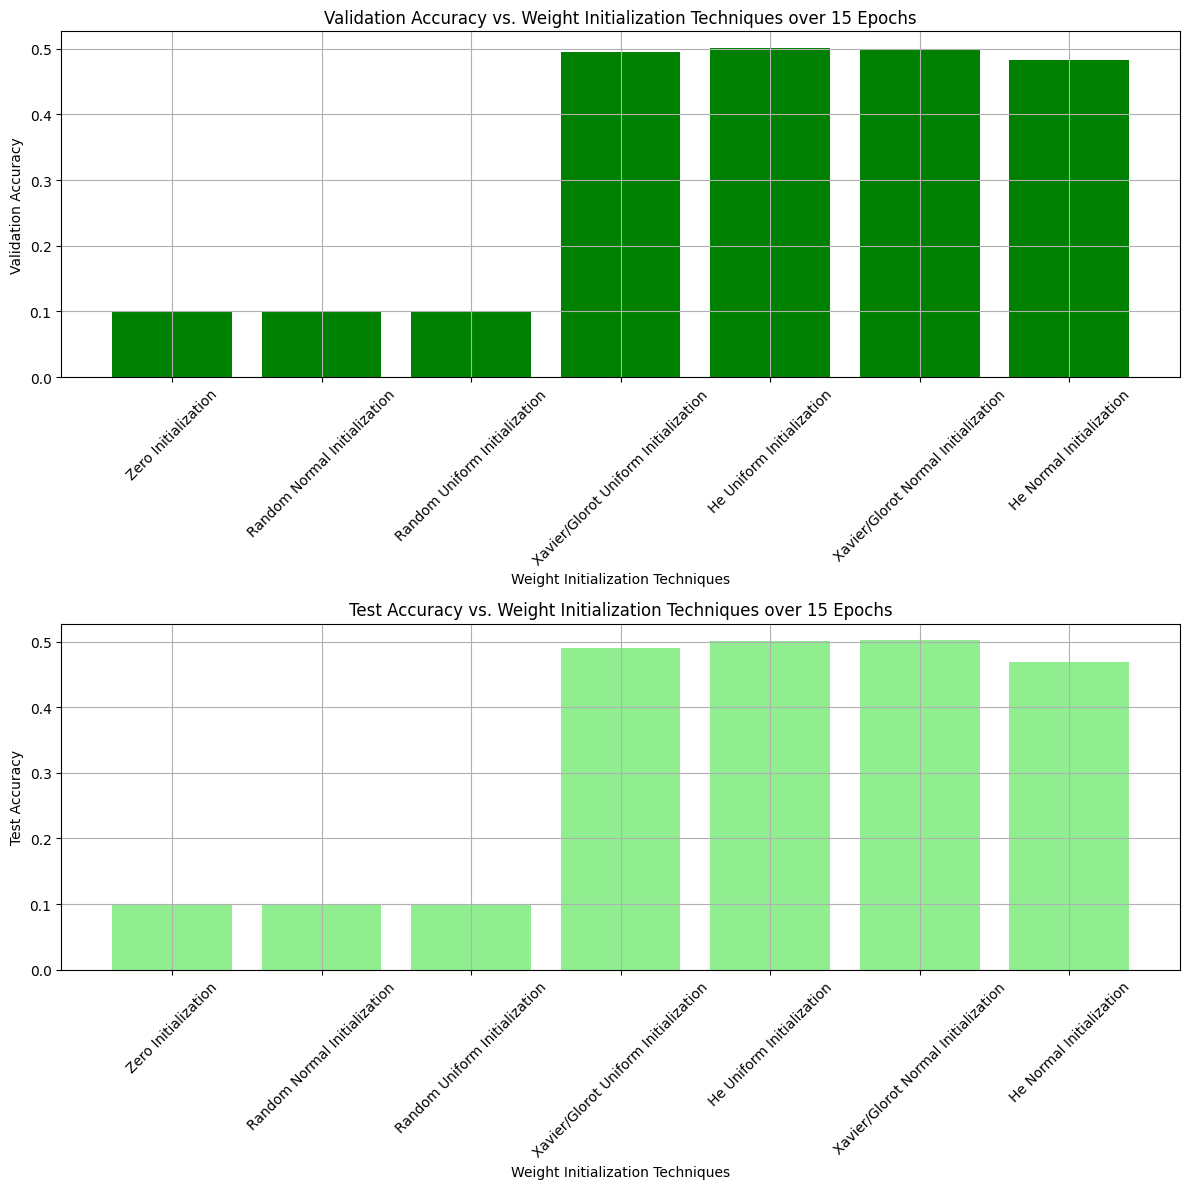

In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(initializer_names, val_accuracies, color='green')
ax[0].set_title('Validation Accuracy vs. Weight Initialization Techniques over 15 Epochs')
ax[0].set_xlabel('Weight Initialization Techniques')
ax[0].set_ylabel('Validation Accuracy')
ax[0].set_xticks(range(len(initializer_names)))
ax[0].set_xticklabels(initializer_names, rotation=45)
ax[0].grid(True)

ax[1].bar(initializer_names, test_accuracies, color='lightred')
ax[1].set_title('Test Accuracy vs. Weight Initialization Techniques over 15 Epochs')
ax[1].set_xlabel('Weight Initialization Techniques')
ax[1].set_ylabel('Test Accuracy')
ax[1].set_xticks(range(len(initializer_names)))
ax[1].set_xticklabels(initializer_names, rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


## Experiment 2.6: Understand the role of Optimization Algorithm and Implement the different Algorithms starting with Batch Gradient Descent, SGD, mini-batch SGD, Momentum, RMS prop and ADAM. Also study the role of Learning rate. 


#### Experiment to determine the effect on models performance when using different optimization algorithms at learning rate 0.01

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

def create_cnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def compile_and_train_model(optimizer, epochs=15, batch_size=64):
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=0)

    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return val_acc, test_acc

optimizers_list = {
    'Batch Gradient Descent': (optimizers.SGD(learning_rate=0.01), len(train_images)),  
    'SGD': (optimizers.SGD(learning_rate=0.01), 1),  
    'Mini-batch SGD': (optimizers.SGD(learning_rate=0.01), 64),  
    'Momentum': (optimizers.SGD(learning_rate=0.01, momentum=0.9), 64),
    'RMSprop': (optimizers.RMSprop(learning_rate=0.01), 64),
    'Adam': (optimizers.Adam(learning_rate=0.01), 64)
}

optimizer_names = []
val_accuracies = []
test_accuracies = []

for name, (optimizer, batch_size) in optimizers_list.items():
    val_acc, test_acc = compile_and_train_model(optimizer, batch_size=batch_size)
    optimizer_names.append(name)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    print(f'{name}, Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch Gradient Descent, Validation Accuracy: 0.13447344303131104, Test Accuracy: 0.13609999418258667
SGD, Validation Accuracy: 0.4063006341457367, Test Accuracy: 0.4041999876499176
Mini-batch SGD, Validation Accuracy: 0.4660665988922119, Test Accuracy: 0.39980000257492065
Momentum, Validation Accuracy: 0.49774977564811707, Test Accuracy: 0.49230000376701355
RMSprop, Validation Accuracy: 0.10009001195430756, Test Accuracy: 0.10000000149011612
Adam, Validation Accuracy: 0.3670566976070404, Test Accuracy: 0.3361999988555908


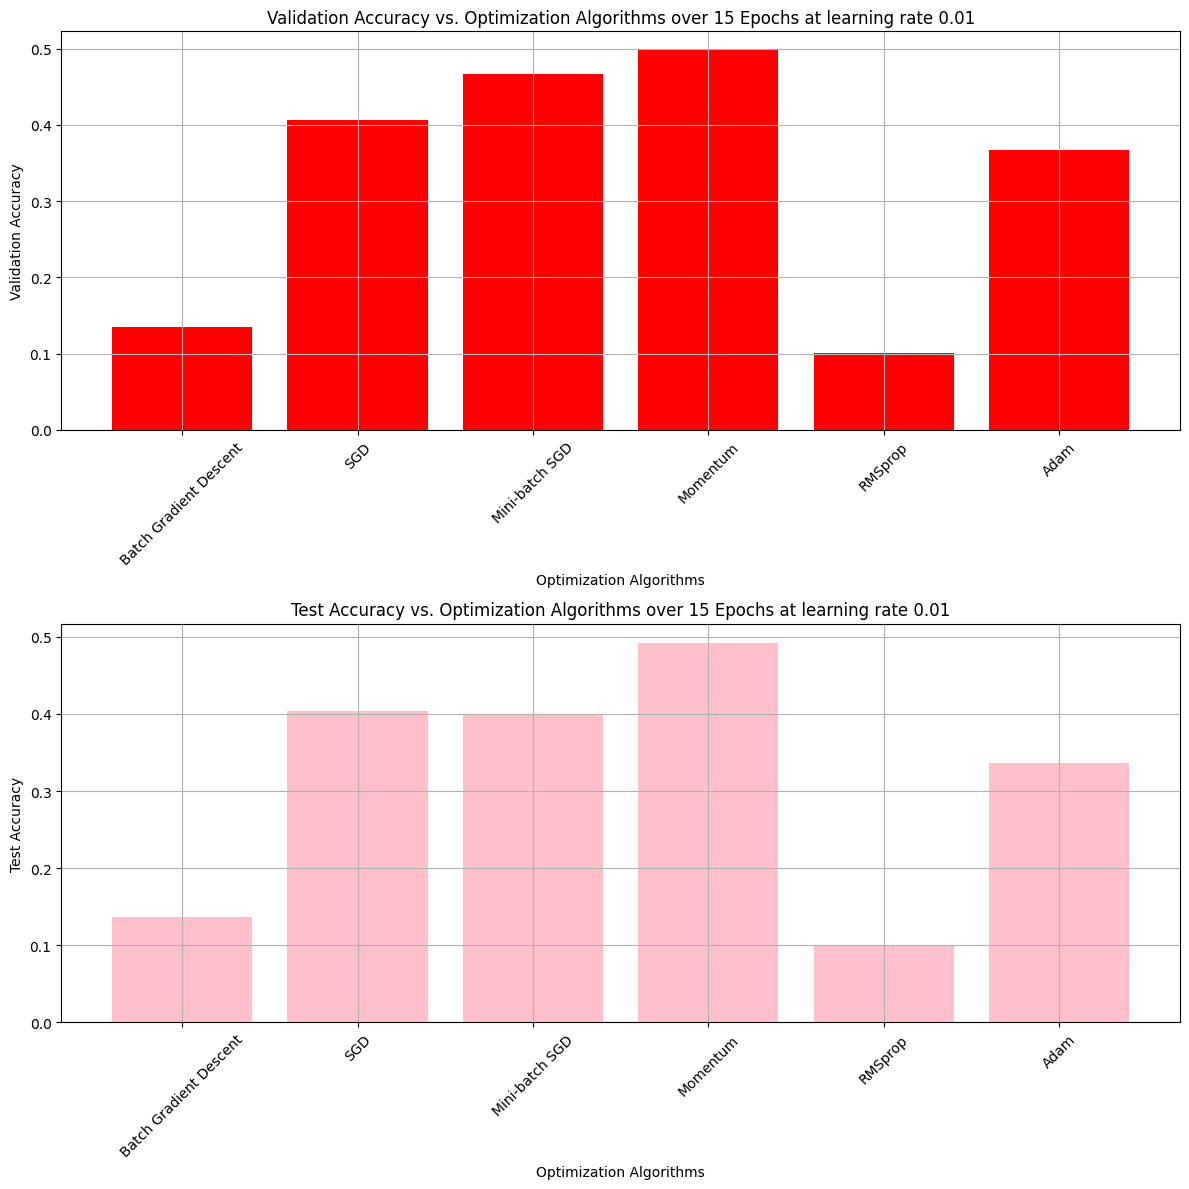

In [59]:

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(optimizer_names, val_accuracies, color='red')
ax[0].set_title('Validation Accuracy vs. Optimization Algorithms over 15 Epochs at learning rate 0.01')
ax[0].set_xlabel('Optimization Algorithms')
ax[0].set_ylabel('Validation Accuracy')
ax[0].set_xticks(range(len(optimizer_names)))
ax[0].set_xticklabels(optimizer_names, rotation=45)
ax[0].grid(True)

ax[1].bar(optimizer_names, test_accuracies, color='pink')
ax[1].set_title('Test Accuracy vs. Optimization Algorithms over 15 Epochs at learning rate 0.01')
ax[1].set_xlabel('Optimization Algorithms')
ax[1].set_ylabel('Test Accuracy')
ax[1].set_xticks(range(len(optimizer_names)))
ax[1].set_xticklabels(optimizer_names, rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


#### Experiment to determine the effect on models performance when using different optimization algorithms at learning rate 0.001

C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch Gradient Descent, Validation Accuracy: 0.09666966646909714, Test Accuracy: 0.09070000052452087
SGD, Validation Accuracy: 0.521692156791687, Test Accuracy: 0.5120999813079834
Mini-batch SGD, Validation Accuracy: 0.4185418486595154, Test Accuracy: 0.4226999878883362
Momentum, Validation Accuracy: 0.502970278263092, Test Accuracy: 0.4999000132083893
RMSprop, Validation Accuracy: 0.4775877594947815, Test Accuracy: 0.4740999937057495
Adam, Validation Accuracy: 0.49558955430984497, Test Accuracy: 0.49720001220703125


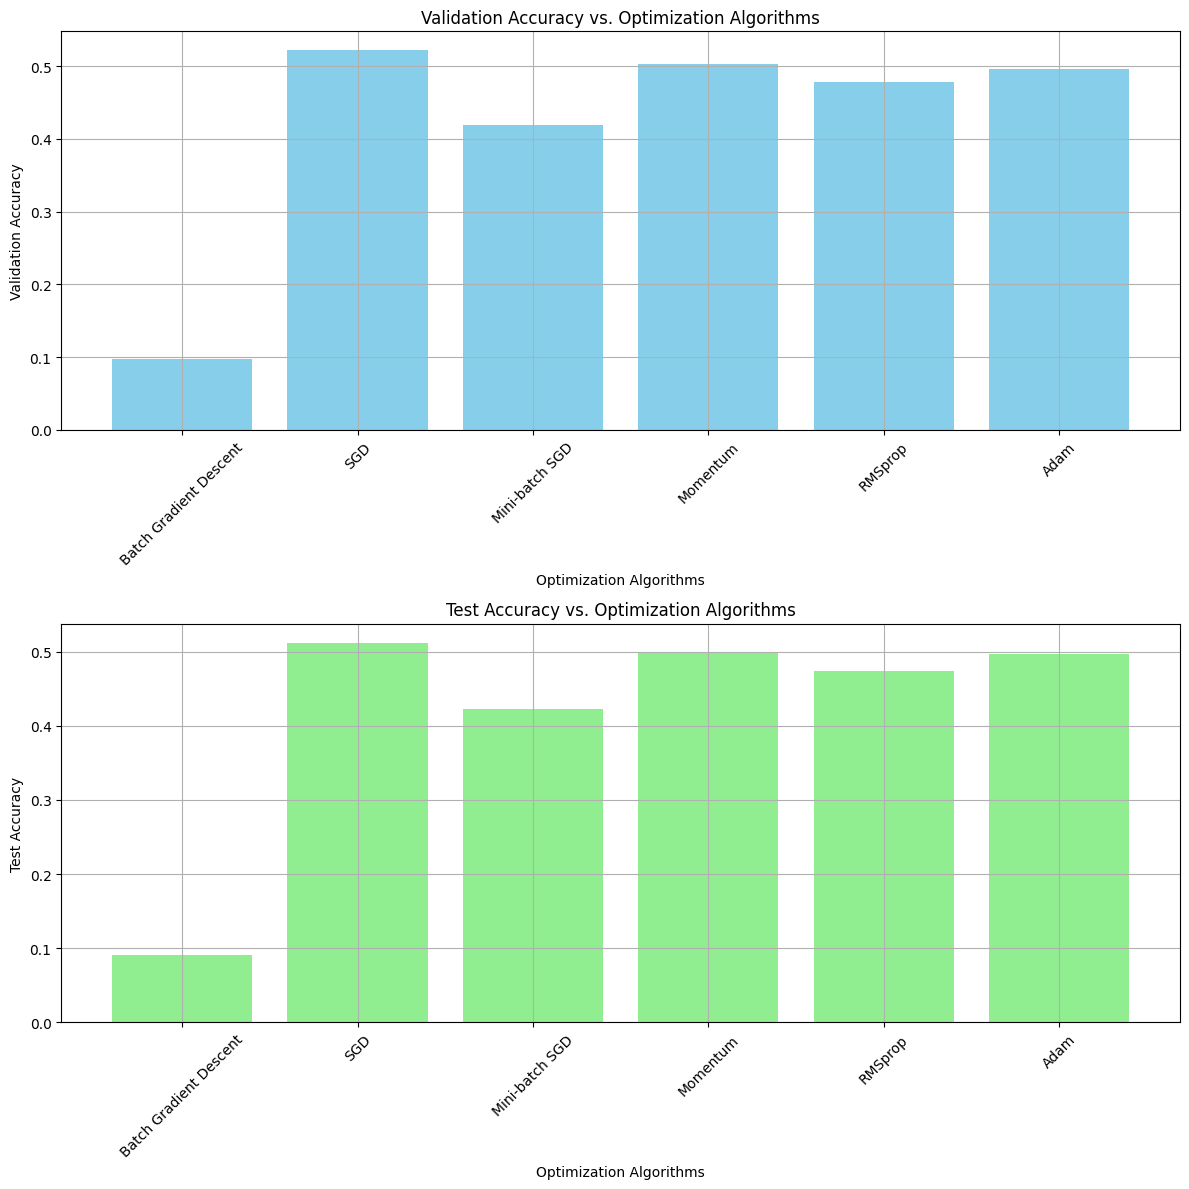

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

def create_cnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def compile_and_train_model(optimizer, epochs=20, batch_size=64):
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=0)

    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return val_acc, test_acc

optimizers_list = {
    'Batch Gradient Descent': (optimizers.SGD(learning_rate=0.001), len(train_images)),
    'SGD': (optimizers.SGD(learning_rate=0.001), 1),
    'Mini-batch SGD': (optimizers.SGD(learning_rate=0.001), 64),
    'Momentum': (optimizers.SGD(learning_rate=0.001, momentum=0.9), 64),
    'RMSprop': (optimizers.RMSprop(learning_rate=0.001), 64),
    'Adam': (optimizers.Adam(learning_rate=0.001), 64)
}

optimizer_names = []
val_accuracies = []
test_accuracies = []

for name, (optimizer, batch_size) in optimizers_list.items():
    val_acc, test_acc = compile_and_train_model(optimizer, batch_size=batch_size)
    optimizer_names.append(name)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    print(f'{name}, Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}')

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(optimizer_names, val_accuracies, color='skyblue')
ax[0].set_title('Validation Accuracy vs. Optimization Algorithms')
ax[0].set_xlabel('Optimization Algorithms')
ax[0].set_ylabel('Validation Accuracy')
ax[0].set_xticks(range(len(optimizer_names)))
ax[0].set_xticklabels(optimizer_names, rotation=45)
ax[0].grid(True)

ax[1].bar(optimizer_names, test_accuracies, color='lightgreen')
ax[1].set_title('Test Accuracy vs. Optimization Algorithms')
ax[1].set_xlabel('Optimization Algorithms')
ax[1].set_ylabel('Test Accuracy')
ax[1].set_xticks(range(len(optimizer_names)))
ax[1].set_xticklabels(optimizer_names, rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()

#### Experiment to determine the effect on models performance when using different optimization algorithms at learning rate 0.1

C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch Gradient Descent, Validation Accuracy: 0.17137713730335236, Test Accuracy: 0.17090000212192535
SGD, Validation Accuracy: 0.09990999102592468, Test Accuracy: 0.10000000149011612
Mini-batch SGD, Validation Accuracy: 0.4498649835586548, Test Accuracy: 0.4339999854564667
Momentum, Validation Accuracy: 0.16651664674282074, Test Accuracy: 0.10000000149011612
RMSprop, Validation Accuracy: 0.10009001195430756, Test Accuracy: 0.10000000149011612
Adam, Validation Accuracy: 0.10009001195430756, Test Accuracy: 0.10000000149011612


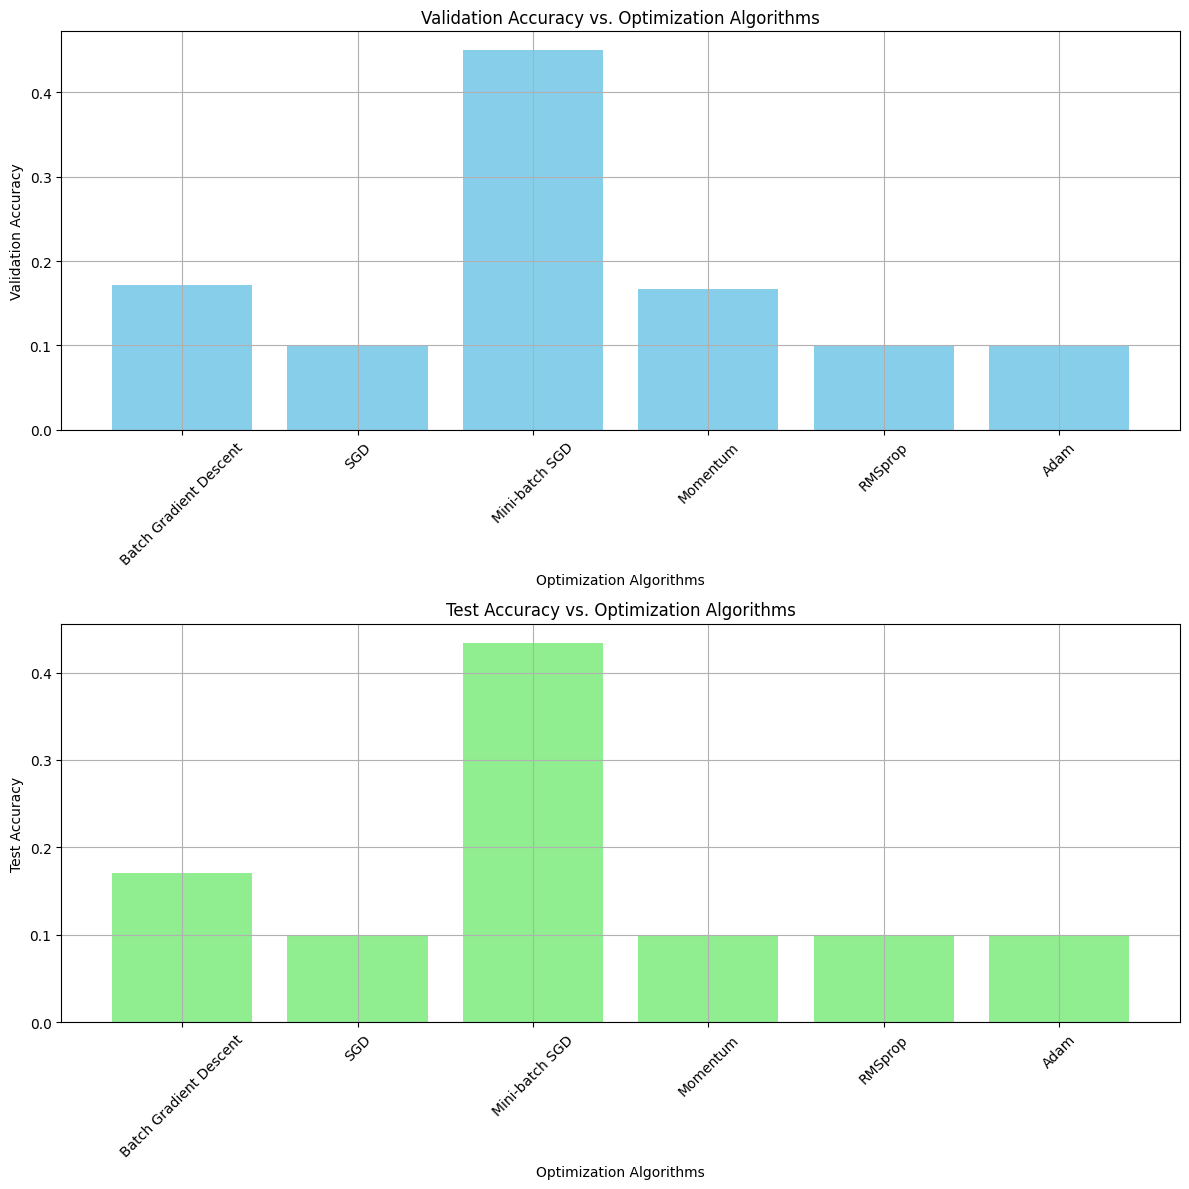

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

def create_cnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def compile_and_train_model(optimizer, epochs=10, batch_size=64):
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=0)

    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return val_acc, test_acc

l = 0.1  

optimizers_list = {
    'Batch Gradient Descent': (optimizers.SGD(learning_rate=l), len(train_images)),  
    'SGD': (optimizers.SGD(learning_rate=l), 1),  
    'Mini-batch SGD': (optimizers.SGD(learning_rate=l), 64),  
    'Momentum': (optimizers.SGD(learning_rate=l, momentum=0.9), 64),
    'RMSprop': (optimizers.RMSprop(learning_rate=l), 64),
    'Adam': (optimizers.Adam(learning_rate=l), 64)
}

optimizer_names = []
val_accuracies = []
test_accuracies = []

for name, (optimizer, batch_size) in optimizers_list.items():
    val_acc, test_acc = compile_and_train_model(optimizer, batch_size=batch_size)
    optimizer_names.append(name)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    print(f'{name}, Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}')

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(optimizer_names, val_accuracies, color='skyblue')
ax[0].set_title('Validation Accuracy vs. Optimization Algorithms')
ax[0].set_xlabel('Optimization Algorithms')
ax[0].set_ylabel('Validation Accuracy')
ax[0].set_xticks(range(len(optimizer_names)))
ax[0].set_xticklabels(optimizer_names, rotation=45)
ax[0].grid(True)

ax[1].bar(optimizer_names, test_accuracies, color='lightgreen')
ax[1].set_title('Test Accuracy vs. Optimization Algorithms')
ax[1].set_xlabel('Optimization Algorithms')
ax[1].set_ylabel('Test Accuracy')
ax[1].set_xticks(range(len(optimizer_names)))
ax[1].set_xticklabels(optimizer_names, rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


#### Experiment to determine the effect on models performance when using different optimization algorithms at learning rate 0.05

C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch Gradient Descent, Validation Accuracy: 0.17875787615776062, Test Accuracy: 0.1776999980211258
SGD, Validation Accuracy: 0.10009001195430756, Test Accuracy: 0.10000000149011612
Mini-batch SGD, Validation Accuracy: 0.48280829191207886, Test Accuracy: 0.47620001435279846
Momentum, Validation Accuracy: 0.38793879747390747, Test Accuracy: 0.3804999887943268
RMSprop, Validation Accuracy: 0.10009001195430756, Test Accuracy: 0.10000000149011612
Adam, Validation Accuracy: 0.10009001195430756, Test Accuracy: 0.10000000149011612


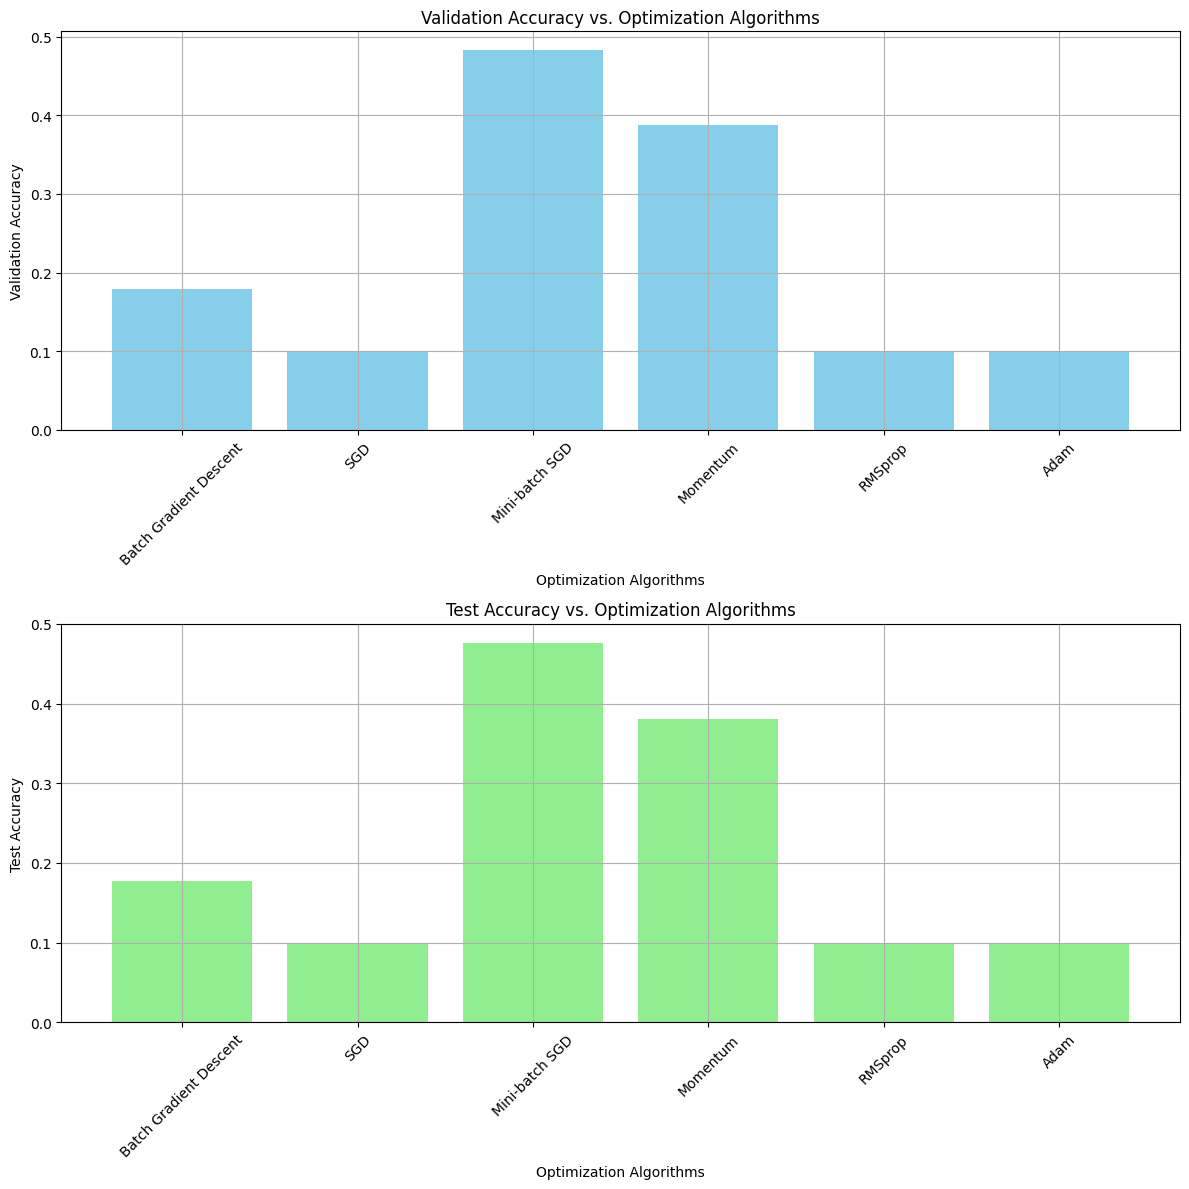

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

def create_cnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def compile_and_train_model(optimizer, epochs=10, batch_size=64):
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=0)

    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return val_acc, test_acc

l = 0.05

optimizers_list = {
    'Batch Gradient Descent': (optimizers.SGD(learning_rate=l), len(train_images)),
    'SGD': (optimizers.SGD(learning_rate=l), 1),
    'Mini-batch SGD': (optimizers.SGD(learning_rate=l), 64),
    'Momentum': (optimizers.SGD(learning_rate=l, momentum=0.9), 64),
    'RMSprop': (optimizers.RMSprop(learning_rate=l), 64),
    'Adam': (optimizers.Adam(learning_rate=l), 64)
}

optimizer_names = []
val_accuracies = []
test_accuracies = []

for name, (optimizer, batch_size) in optimizers_list.items():
    val_acc, test_acc = compile_and_train_model(optimizer, batch_size=batch_size)
    optimizer_names.append(name)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    print(f'{name}, Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}')

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(optimizer_names, val_accuracies, color='skyblue')
ax[0].set_title('Validation Accuracy vs. Optimization Algorithms')
ax[0].set_xlabel('Optimization Algorithms')
ax[0].set_ylabel('Validation Accuracy')
ax[0].set_xticks(range(len(optimizer_names)))
ax[0].set_xticklabels(optimizer_names, rotation=45)
ax[0].grid(True)

ax[1].bar(optimizer_names, test_accuracies, color='lightgreen')
ax[1].set_title('Test Accuracy vs. Optimization Algorithms')
ax[1].set_xlabel('Optimization Algorithms')
ax[1].set_ylabel('Test Accuracy')
ax[1].set_xticks(range(len(optimizer_names)))
ax[1].set_xticklabels(optimizer_names, rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


#### Experiment to determine the effect on models performance when using different optimization algorithms at learning rate 0.009

C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch Gradient Descent, Validation Accuracy: 0.13447344303131104, Test Accuracy: 0.12929999828338623
SGD, Validation Accuracy: 0.41080108284950256, Test Accuracy: 0.4004000127315521
Mini-batch SGD, Validation Accuracy: 0.44950494170188904, Test Accuracy: 0.4526999890804291
Momentum, Validation Accuracy: 0.47146713733673096, Test Accuracy: 0.4758000075817108
RMSprop, Validation Accuracy: 0.2145814597606659, Test Accuracy: 0.20360000431537628
Adam, Validation Accuracy: 0.10009001195430756, Test Accuracy: 0.10000000149011612


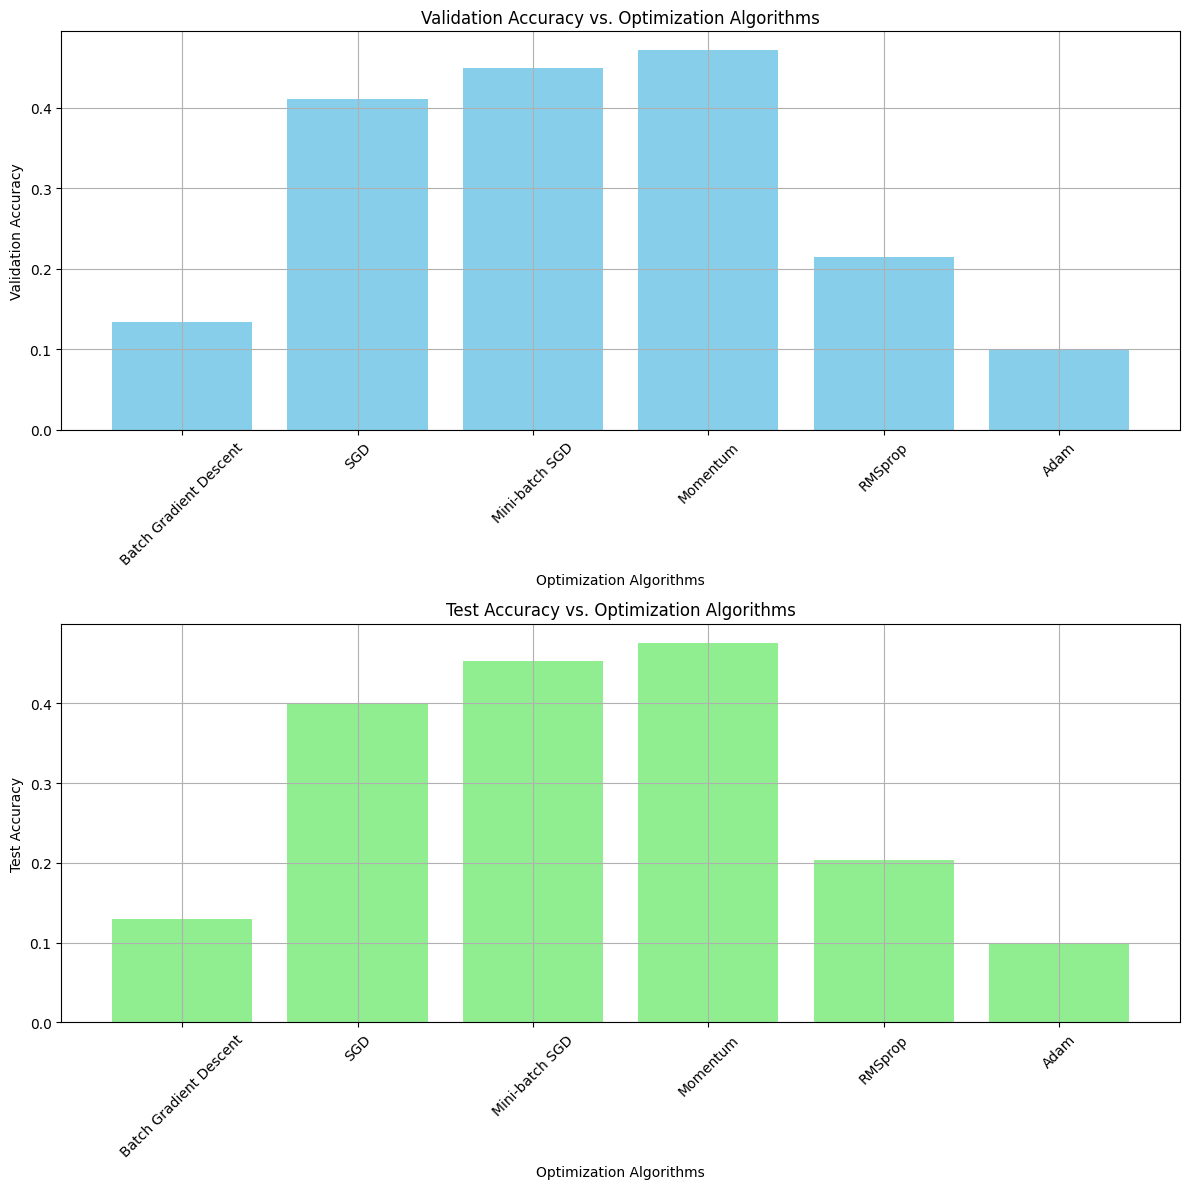

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

def create_cnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def compile_and_train_model(optimizer, epochs=10, batch_size=64):
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=0)

    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return val_acc, test_acc

l = 0.009

optimizers_list = {
    'Batch Gradient Descent': (optimizers.SGD(learning_rate=l), len(train_images)),
    'SGD': (optimizers.SGD(learning_rate=l), 1),
    'Mini-batch SGD': (optimizers.SGD(learning_rate=l), 64),
    'Momentum': (optimizers.SGD(learning_rate=l, momentum=0.9), 64),
    'RMSprop': (optimizers.RMSprop(learning_rate=l), 64),
    'Adam': (optimizers.Adam(learning_rate=l), 64)
}

optimizer_names = []
val_accuracies = []
test_accuracies = []

for name, (optimizer, batch_size) in optimizers_list.items():
    val_acc, test_acc = compile_and_train_model(optimizer, batch_size=batch_size)
    optimizer_names.append(name)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    print(f'{name}, Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}')

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(optimizer_names, val_accuracies, color='skyblue')
ax[0].set_title('Validation Accuracy vs. Optimization Algorithms')
ax[0].set_xlabel('Optimization Algorithms')
ax[0].set_ylabel('Validation Accuracy')
ax[0].set_xticks(range(len(optimizer_names)))
ax[0].set_xticklabels(optimizer_names, rotation=45)
ax[0].grid(True)

ax[1].bar(optimizer_names, test_accuracies, color='lightgreen')
ax[1].set_title('Test Accuracy vs. Optimization Algorithms')
ax[1].set_xlabel('Optimization Algorithms')
ax[1].set_ylabel('Test Accuracy')
ax[1].set_xticks(range(len(optimizer_names)))
ax[1].set_xticklabels(optimizer_names, rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Experiment to determine models training time when using different optimization algorithms at learning rate 0.009 for just one Epoch. 

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

def create_cnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def compile_and_train_model(optimizer, epochs=1, batch_size=64):
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=0)
    end_time = time.time()
    
    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    training_time = end_time - start_time

    return val_acc, test_acc, training_time

learning_rate = 0.009
optimizers_list = {
    'Batch Gradient Descent': (optimizers.SGD(learning_rate=learning_rate), len(train_images)),
    'SGD': (optimizers.SGD(learning_rate=learning_rate), 1),
    'Mini-batch SGD': (optimizers.SGD(learning_rate=learning_rate), 64),
    'Momentum': (optimizers.SGD(learning_rate=learning_rate, momentum=0.9), 64),
    'RMSprop': (optimizers.RMSprop(learning_rate=learning_rate), 64),
    'Adam': (optimizers.Adam(learning_rate=learning_rate), 64)
}

optimizer_names = []
training_times = []

for name, (optimizer, batch_size) in optimizers_list.items():
    val_acc, test_acc, training_time = compile_and_train_model(optimizer, batch_size=batch_size)
    optimizer_names.append(name)
    training_times.append(training_time)
    print(f'{name}, Training Time: {training_time:.2f} seconds')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch Gradient Descent, Training Time: 4.20 seconds
SGD, Training Time: 91.31 seconds
Mini-batch SGD, Training Time: 3.83 seconds
Momentum, Training Time: 4.76 seconds
RMSprop, Training Time: 5.48 seconds
Adam, Training Time: 6.73 seconds


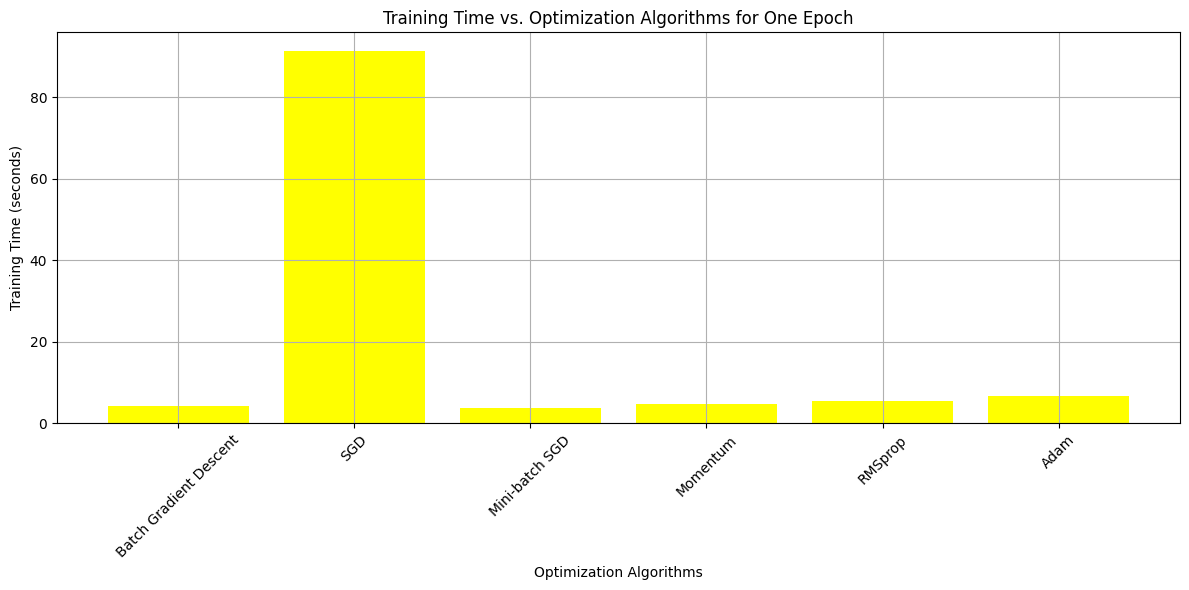

In [63]:

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(optimizer_names, training_times, color='yellow')
ax.set_title('Training Time vs. Optimization Algorithms for One Epoch')
ax.set_xlabel('Optimization Algorithms')
ax.set_ylabel('Training Time (seconds)')
ax.set_xticks(range(len(optimizer_names)))
ax.set_xticklabels(optimizer_names, rotation=45)
ax.grid(True)

plt.tight_layout()
plt.show()


### Experiment to determine models training time when using different optimization algorithms at learning rate 0.009 for 10 Epoch.

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

def create_cnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def compile_and_train_model(optimizer, epochs=10, batch_size=64):
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=0)
    end_time = time.time()
    
    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    training_time = end_time - start_time

    return val_acc, test_acc, training_time

learning_rate = 0.009
optimizers_list = {
    'Batch Gradient Descent': (optimizers.SGD(learning_rate=learning_rate), len(train_images)),
    'SGD': (optimizers.SGD(learning_rate=learning_rate), 1),
    'Mini-batch SGD': (optimizers.SGD(learning_rate=learning_rate), 64),
    'Momentum': (optimizers.SGD(learning_rate=learning_rate, momentum=0.9), 64),
    'RMSprop': (optimizers.RMSprop(learning_rate=learning_rate), 64),
    'Adam': (optimizers.Adam(learning_rate=learning_rate), 64)
}

optimizer_names = []
training_times = []

for name, (optimizer, batch_size) in optimizers_list.items():
    val_acc, test_acc, training_time = compile_and_train_model(optimizer, batch_size=batch_size)
    optimizer_names.append(name)
    training_times.append(training_time)
    print(f'{name}, Training Time: {training_time:.2f} seconds')


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<keras.src.optimizers.sgd.SGD object at 0x000002935DC3CB20> 44445
Batch Gradient Descent, Training Time: 9.00 seconds
<keras.src.optimizers.sgd.SGD object at 0x000002936A22DB40> 1
SGD, Training Time: 882.84 seconds
<keras.src.optimizers.sgd.SGD object at 0x000002936A22DDE0> 64
Mini-batch SGD, Training Time: 24.40 seconds
<keras.src.optimizers.sgd.SGD object at 0x000002936CD6AE00> 64
Momentum, Training Time: 27.49 seconds
<keras.src.optimizers.rmsprop.RMSprop object at 0x000002936D0D2FE0> 64
RMSprop, Training Time: 35.89 seconds
<keras.src.optimizers.adam.Adam object at 0x000002936D16FFA0> 64
Adam, Training Time: 43.13 seconds


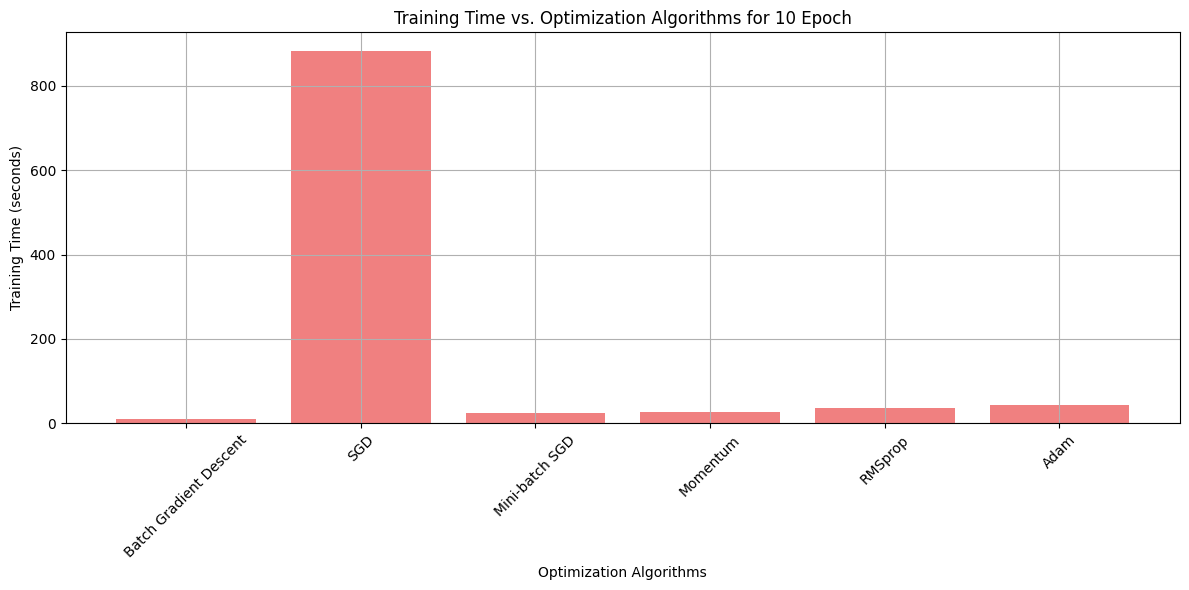

In [18]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the bar graph on the single axis
ax.bar(optimizer_names, training_times, color='lightcoral')
ax.set_title('Training Time vs. Optimization Algorithms for 10 Epoch')
ax.set_xlabel('Optimization Algorithms')
ax.set_ylabel('Training Time (seconds)')
ax.set_xticks(range(len(optimizer_names)))
ax.set_xticklabels(optimizer_names, rotation=45)
ax.grid(True)

plt.tight_layout()
plt.show()


### Experiment to determine models performance, training time when using different optimization algorithms like SGD, Momentum, RMSprop, Adam at learning rates  [0.001, 0.003, 0.006, 0.01, 0.03, 0.06,  0.1, 0.3, 0.6] for 25 Epoch.

C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


SGD (lr=0.001), Validation Accuracy: 0.41170117259025574, Test Accuracy: 0.414900004863739, Training Time: 59.90916466712952
SGD (lr=0.003), Validation Accuracy: 0.46570655703544617, Test Accuracy: 0.4523000121116638, Training Time: 60.17952847480774
SGD (lr=0.006), Validation Accuracy: 0.507830798625946, Test Accuracy: 0.5127999782562256, Training Time: 60.077714681625366
SGD (lr=0.01), Validation Accuracy: 0.4959495961666107, Test Accuracy: 0.4984999895095825, Training Time: 59.67248606681824
SGD (lr=0.03), Validation Accuracy: 0.507830798625946, Test Accuracy: 0.41019999980926514, Training Time: 59.59853005409241
SGD (lr=0.06), Validation Accuracy: 0.4934293329715729, Test Accuracy: 0.5080000162124634, Training Time: 60.43995141983032
SGD (lr=0.1), Validation Accuracy: 0.49432942271232605, Test Accuracy: 0.503600001335144, Training Time: 60.526172399520874
SGD (lr=0.3), Validation Accuracy: 0.4498649835586548, Test Accuracy: 0.435699999332428, Training Time: 60.75846862792969
SGD (l

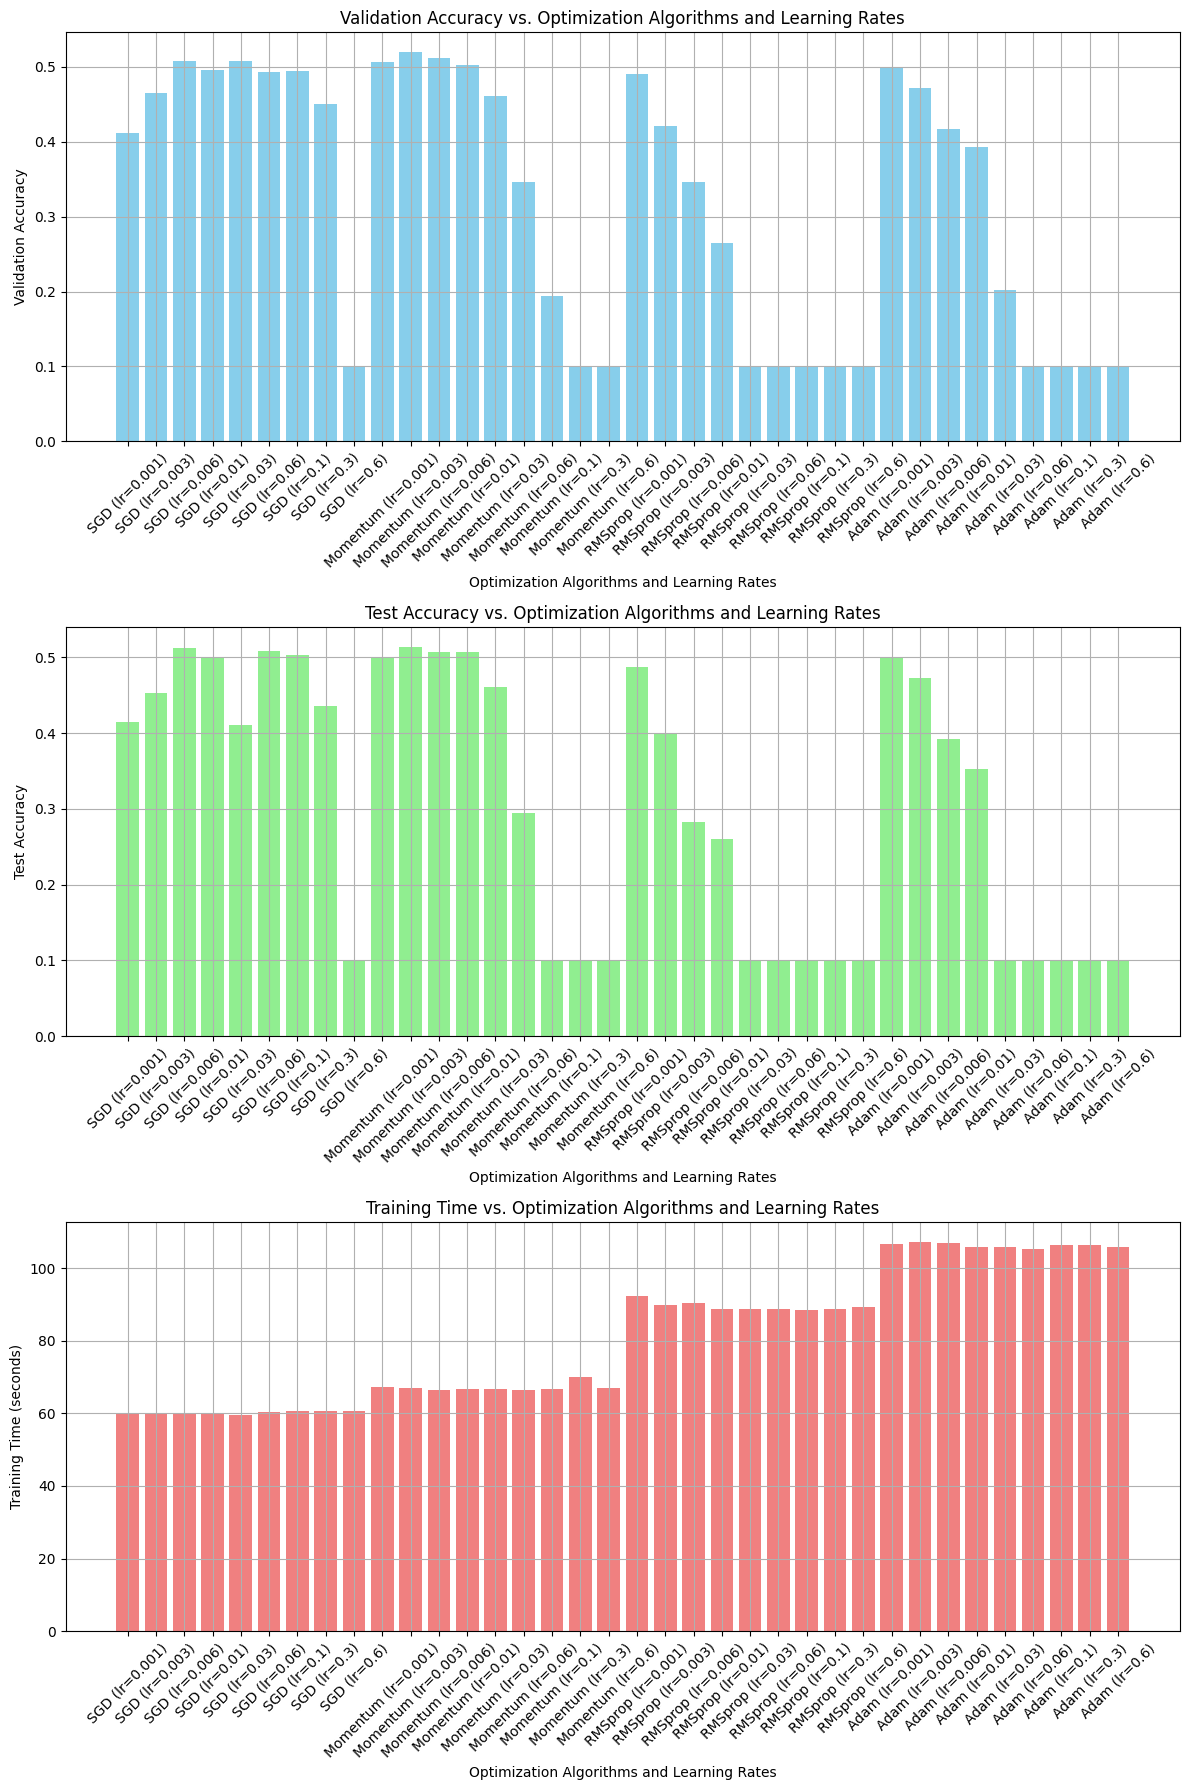

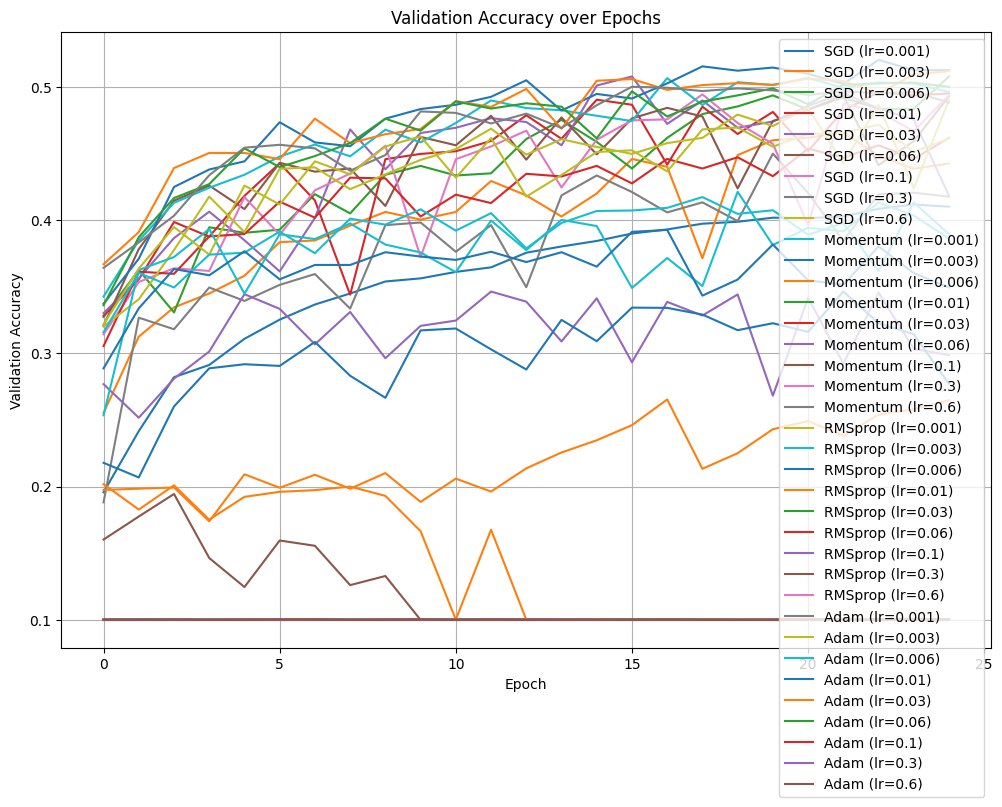

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1111, random_state=42, stratify=train_labels)

def create_cnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def compile_and_train_model(optimizer, epochs=1, batch_size=64):
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=0)
    training_time = time.time() - start_time

    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return val_acc, test_acc, training_time, history

learning_rates = [0.001, 0.003, 0.006, 0.01, 0.03, 0.06,  0.1, 0.3, 0.6]
optimizers_list = {
    'SGD': [(optimizers.SGD(learning_rate=lr), lr) for lr in learning_rates],
    'Momentum': [(optimizers.SGD(learning_rate=lr, momentum=0.9), lr) for lr in learning_rates],
    'RMSprop': [(optimizers.RMSprop(learning_rate=lr), lr) for lr in learning_rates],
    'Adam': [(optimizers.Adam(learning_rate=lr), lr) for lr in learning_rates]
}

optimizer_names = []
val_accuracies = []
test_accuracies = []
training_times = []
histories = []

for name, optimizer_lr_list in optimizers_list.items():
    for optimizer, lr in optimizer_lr_list:
        val_acc, test_acc, training_time, history = compile_and_train_model(optimizer, epochs=25, batch_size=64)
        optimizer_names.append(f'{name} (lr={lr})')
        val_accuracies.append(val_acc)
        test_accuracies.append(test_acc)
        training_times.append(training_time)
        histories.append(history)
        print(f'{name} (lr={lr}), Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}, Training Time: {training_time}')

fig, ax = plt.subplots(3, 1, figsize=(12, 18))

ax[0].bar(optimizer_names, val_accuracies, color='skyblue')
ax[0].set_title('Validation Accuracy vs. Optimization Algorithms and Learning Rates')
ax[0].set_xlabel('Optimization Algorithms and Learning Rates')
ax[0].set_ylabel('Validation Accuracy')
ax[0].set_xticks(range(len(optimizer_names)))
ax[0].set_xticklabels(optimizer_names, rotation=45)
ax[0].grid(True)

ax[1].bar(optimizer_names, test_accuracies, color='lightgreen')
ax[1].set_title('Test Accuracy vs. Optimization Algorithms and Learning Rates')
ax[1].set_xlabel('Optimization Algorithms and Learning Rates')
ax[1].set_ylabel('Test Accuracy')
ax[1].set_xticks(range(len(optimizer_names)))
ax[1].set_xticklabels(optimizer_names, rotation=45)
ax[1].grid(True)

ax[2].bar(optimizer_names, training_times, color='lightcoral')
ax[2].set_title('Training Time vs. Optimization Algorithms and Learning Rates')
ax[2].set_xlabel('Optimization Algorithms and Learning Rates')
ax[2].set_ylabel('Training Time (seconds)')
ax[2].set_xticks(range(len(optimizer_names)))
ax[2].set_xticklabels(optimizer_names, rotation=45)
ax[2].grid(True)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))

for name, history in zip(optimizer_names, histories):
    ax.plot(history.history['val_accuracy'], label=name)

ax.set_title('Validation Accuracy over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
ax.legend()
ax.grid(True)

plt.show()


## Experiment 2.7: Analize the optimal splitting of data into training, validation, and testing datasets. 

C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Split 70/15/15, Validation Accuracy: 0.5310, Test Accuracy: 0.5232


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Split 80/10/10, Validation Accuracy: 0.5380, Test Accuracy: 0.5185


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Split 90/5/5, Validation Accuracy: 0.5433, Test Accuracy: 0.5303


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Split 60/20/20, Validation Accuracy: 0.5204, Test Accuracy: 0.5015


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Split 50/25/25, Validation Accuracy: 0.5134, Test Accuracy: 0.4991


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Split 40/30/30, Validation Accuracy: 0.5066, Test Accuracy: 0.4849


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Split 75/15/10, Validation Accuracy: 0.5328, Test Accuracy: 0.5283


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Split 85/10/5, Validation Accuracy: 0.5408, Test Accuracy: 0.5347


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Split 65/20/15, Validation Accuracy: 0.5247, Test Accuracy: 0.5190


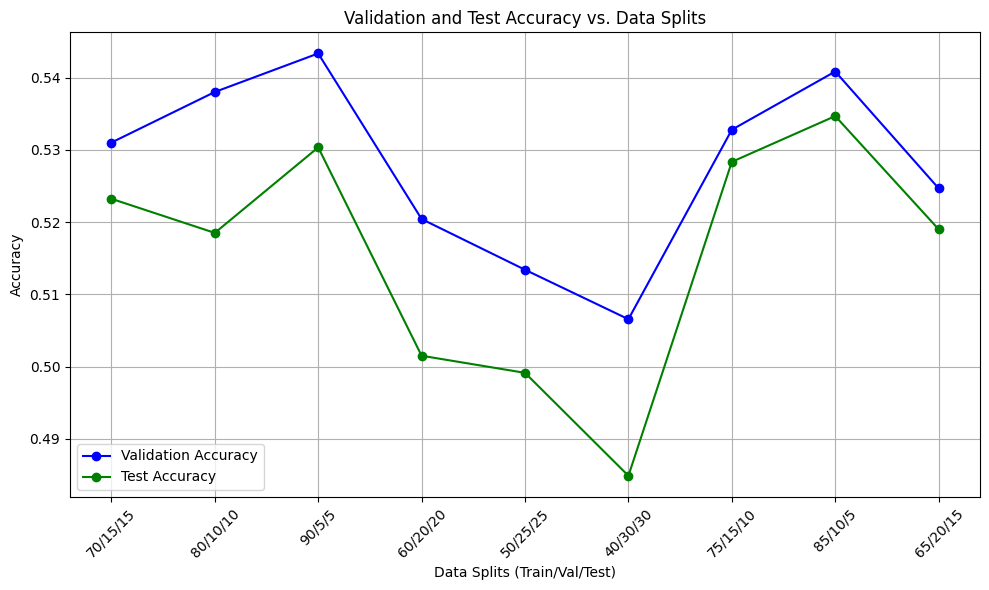

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

def create_cnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def compile_and_train_model(train_images, train_labels, val_images, val_labels, test_images, test_labels, optimizer, epochs=20, batch_size=64):
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=0)

    val_acc = max(history.history['val_accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return val_acc, test_acc

split_ratios = [
    (0.70, 0.15, 0.15),
    (0.80, 0.10, 0.10),
    (0.90, 0.05, 0.05),
    (0.60, 0.20, 0.20),
    (0.50, 0.25, 0.25),
    (0.40, 0.30, 0.30),
    (0.75, 0.15, 0.10),
    (0.85, 0.10, 0.05),
    (0.65, 0.20, 0.15)
]

split_names = []
val_accuracies = []
test_accuracies = []

for train_ratio, val_ratio, test_ratio in split_ratios:
    total_size = len(train_images) + len(test_images)
    train_size = int(total_size * train_ratio)
    val_size = int(total_size * val_ratio)
    test_size = total_size - train_size - val_size

    combined_images = np.concatenate((train_images, test_images))
    combined_labels = np.concatenate((train_labels, test_labels))

    train_images_split, temp_images, train_labels_split, temp_labels = train_test_split(
        combined_images, combined_labels, train_size=train_size, random_state=42, stratify=combined_labels)
    val_images_split, test_images_split, val_labels_split, test_labels_split = train_test_split(
        temp_images, temp_labels, test_size=test_size, random_state=42, stratify=temp_labels)

    optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.9)
    
    val_acc, test_acc = compile_and_train_model(train_images_split, train_labels_split, val_images_split, val_labels_split, test_images_split, test_labels_split,
                                                optimizer=optimizer, epochs=50, batch_size=64)
    
    split_names.append(f'{int(train_ratio*100)}/{int(val_ratio*100)}/{int(test_ratio*100)}')
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    print(f'Split {int(train_ratio*100)}/{int(val_ratio*100)}/{int(test_ratio*100)}, Validation Accuracy: {val_acc:.4f}, Test Accuracy: {test_acc:.4f}')

plt.figure(figsize=(10, 6))

plt.plot(split_names, val_accuracies, marker='o', linestyle='-', color='b', label='Validation Accuracy')
plt.plot(split_names, test_accuracies, marker='o', linestyle='-', color='g', label='Test Accuracy')

plt.title('Validation and Test Accuracy vs. Data Splits')
plt.xlabel('Data Splits (Train/Val/Test)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## Experiment 2.8: Understand the role of Regularization techniques and Implement L1, L2, Dropout, Early stopping and batch normalizationtechniques and study the effect of these techniques on models’ performance

Running experiment with L1


C:\Users\mmac259\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


L1 - Train Accuracy: 0.3619, Validation Accuracy: 0.3703, Test Accuracy: 0.3768
Running experiment with L2
L2 - Train Accuracy: 0.6869, Validation Accuracy: 0.6781, Test Accuracy: 0.6782
Running experiment with Dropout
Dropout - Train Accuracy: 0.2798, Validation Accuracy: 0.3159, Test Accuracy: 0.3185
Running experiment with BatchNorm
BatchNorm - Train Accuracy: 0.9595, Validation Accuracy: 0.7163, Test Accuracy: 0.7139
Running experiment with EarlyStopping
EarlyStopping - Train Accuracy: 0.7208, Validation Accuracy: 0.6922, Test Accuracy: 0.6897


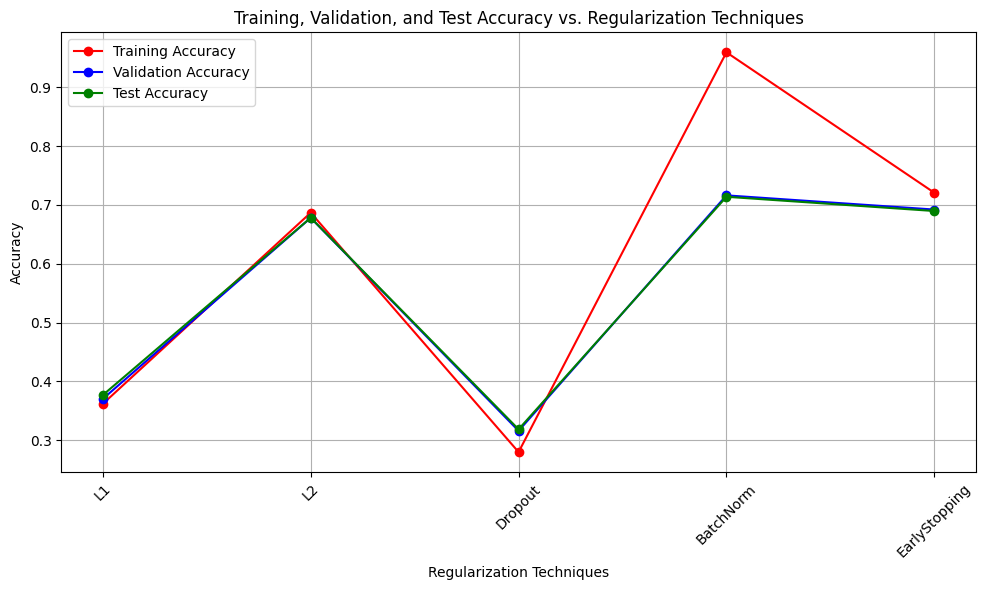

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, regularizers, callbacks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

train_images, test_images = train_images / 255.0, test_images / 255.0

def create_cnn_model(regularization=None, dropout_rate=0.0, batch_norm=False):
    model = models.Sequential()
    
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3),
                            kernel_regularizer=regularization))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularization))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularization))
    if batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularization))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularization))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularization))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularization))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

def compile_and_train_model(model, optimizer, epochs=20, batch_size=64, use_early_stopping=False):
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    if use_early_stopping:
        early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        callback_list = [early_stopping]
    else:
        callback_list = []
    
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), callbacks=callback_list, verbose=0)

    val_acc = max(history.history['val_accuracy'])
    train_acc = max(history.history['accuracy'])
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    
    return train_acc, val_acc, test_acc, history.history['accuracy']

techniques = [ 'L1', 'L2', 'Dropout', 'BatchNorm', 'EarlyStopping']
train_accuracies = []
val_accuracies = []
test_accuracies = []

for technique in techniques:
    print(f'Running experiment with {technique}')
    
    if technique == 'L1':
        model = create_cnn_model(regularization=regularizers.l1(0.001))
        use_early_stopping = False
    elif technique == 'L2':
        model = create_cnn_model(regularization=regularizers.l2(0.001))
        use_early_stopping = False
    elif technique == 'Dropout':
        model = create_cnn_model(dropout_rate=0.5)
        use_early_stopping = False
    elif technique == 'BatchNorm':
        model = create_cnn_model(batch_norm=True)
        use_early_stopping = False
    elif technique == 'EarlyStopping':
        model = create_cnn_model()
        use_early_stopping = True
    
    optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.9)
    
    train_acc, val_acc, test_acc, training_acc_history = compile_and_train_model(model, optimizer, epochs=15, batch_size=64, use_early_stopping=use_early_stopping)
    
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    print(f'{technique} - Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}, Test Accuracy: {test_acc:.4f}')

plt.figure(figsize=(10, 6))

plt.plot(techniques, train_accuracies, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(techniques, val_accuracies, marker='o', linestyle='-', color='b', label='Validation Accuracy')
plt.plot(techniques, test_accuracies, marker='o', linestyle='-', color='g', label='Test Accuracy')

plt.title('Training, Validation, and Test Accuracy vs. Regularization Techniques')
plt.xlabel('Regularization Techniques')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
